<a href="https://colab.research.google.com/github/EsmaeilNarimissa/YouTube-DataDriven-Upgrade/blob/main/ML_YouTube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import this "enhanced_youtube_data.csv" into df and print the first 5 rows
import pandas as pd
df = pd.read_csv('enhanced_youtube_data.csv')
print(df.info())
print(df.shape)
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Basic statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                2993 non-null   object 
 1   title                   2993 non-null   object 
 2   description             2957 non-null   object 
 3   published_at            2993 non-null   object 
 4   thumbnails              2993 non-null   object 
 5   tags                    2993 non-null   object 
 6   category_id             2993 non-null   int64  
 7   default_language        2135 non-null   object 
 8   default_audio_language  2979 non-null   object 
 9   duration                2993 non-null   object 
 10  definition              2993 non-null   object 
 11  caption                 2993 non-null   bool   
 12  licensed_content        2993 non-null   bool   
 13  projection              2993 non-null   object 
 14  views                   2993 non-null   

# 1. Data Cleaning

## 1.1 Handling Missing Values

In [ ]:
# Fill missing descriptions with 'N/A'
df['description'] = df['description'].fillna('N/A')

# Drop language columns since they have many missing values
df = df.drop(['default_language', 'default_audio_language'], axis=1)

# Fill missing video length categories with mode value within same domain
df['video_length_category'] = df.groupby('domain')['video_length_category'].transform(lambda x: x.fillna(x.mode()[0]))

# Check remaining missing values
print(df.isnull().sum())


video_id                 0
title                    0
description              0
published_at             0
thumbnails               0
tags                     0
category_id              0
duration                 0
definition               0
caption                  0
licensed_content         0
projection               0
views                    0
likes                    0
comments                 0
favorites                0
privacy_status           0
license                  0
embed_html               0
topic_categories         0
channel                  0
country                  0
domain                   0
duration_seconds         0
video_length_category    0
engagement_rate          0
publish_year             0
publish_month            0
publish_day              0
publish_dayofweek        0
tag_count                0
dtype: int64


In [ ]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


## 1.2 Data Type Conversion


In [ ]:
# check if published_at, publish_year, and publish_month and published_day are in datetime format
print(df[['published_at', 'publish_year', 'publish_month', 'publish_day']].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   published_at   2993 non-null   object
 1   publish_year   2993 non-null   int64 
 2   publish_month  2993 non-null   int64 
 3   publish_day    2993 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 93.7+ KB
None


In [ ]:
# convert published_at to datetime
df['published_at'] = pd.to_datetime(df['published_at'])

# create publish_year, publish_month, and publish_day from published_at
df['publish_year'] = df['published_at'].dt.year
df['publish_month'] = df['published_at'].dt.month
df['publish_day'] = df['published_at'].dt.day

In [ ]:
# check if published_at, publish_year, and publish_month and published_day are in datetime format
print(df[['published_at', 'publish_year', 'publish_month', 'publish_day']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   published_at   2993 non-null   datetime64[ns]
 1   publish_year   2993 non-null   int32         
 2   publish_month  2993 non-null   int32         
 3   publish_day    2993 non-null   int32         
dtypes: datetime64[ns](1), int32(3)
memory usage: 58.6 KB
None


In [ ]:
# Drop the separate columns to reduce redundancy
df = df.drop(['publish_year', 'publish_month', 'publish_day'], axis=1)




In [ ]:
# Check if the columns were dropped
print(df.columns)

Index(['video_id', 'title', 'description', 'published_at', 'thumbnails',
       'tags', 'category_id', 'duration', 'definition', 'caption',
       'licensed_content', 'projection', 'views', 'likes', 'comments',
       'favorites', 'privacy_status', 'license', 'embed_html',
       'topic_categories', 'channel', 'country', 'domain', 'duration_seconds',
       'video_length_category', 'engagement_rate', 'publish_dayofweek',
       'tag_count'],
      dtype='object')


In [ ]:
# Verify that duration_seconds accurately reflects the total duration in seconds. If discrepancies exist between duration and duration_seconds, ensure consistency
print(df[['duration', 'duration_seconds']].head())



   duration  duration_seconds
0  PT23M52S              1432
1  PT20M24S              1224
2     PT35S                35
3     PT36S                36
4     PT33S                33


In [ ]:
# drop duration column
df = df.drop(['duration'], axis=1)

# check if duration_seconds is in seconds
print(df['duration_seconds'].describe())

# check the existing columns
print(df.columns)


count     2993.000000
mean       394.541931
std        936.936183
min          0.000000
25%         51.000000
50%        101.000000
75%        211.000000
max      11589.000000
Name: duration_seconds, dtype: float64
Index(['video_id', 'title', 'description', 'published_at', 'thumbnails',
       'tags', 'category_id', 'definition', 'caption', 'licensed_content',
       'projection', 'views', 'likes', 'comments', 'favorites',
       'privacy_status', 'license', 'embed_html', 'topic_categories',
       'channel', 'country', 'domain', 'duration_seconds',
       'video_length_category', 'engagement_rate', 'publish_dayofweek',
       'tag_count'],
      dtype='object')


In [ ]:
# For improved memory efficiency and performance, convert object-type categorical columns to the category dtype

# Define a varibale called categorical_cols that stores all the columns that are object type
categorical_cols = df.select_dtypes(include=['object']).columns

# Print the categorical columns
print(categorical_cols)


Index(['video_id', 'title', 'description', 'thumbnails', 'tags', 'definition',
       'projection', 'privacy_status', 'license', 'embed_html',
       'topic_categories', 'channel', 'country', 'domain',
       'video_length_category', 'publish_dayofweek'],
      dtype='object')


In [ ]:
# Convert object-type columns to category dtype
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Check the data types of the columns
print(df.dtypes)



video_id                       category
title                          category
description                    category
published_at             datetime64[ns]
thumbnails                     category
tags                           category
category_id                       int64
definition                     category
caption                            bool
licensed_content                   bool
projection                     category
views                             int64
likes                             int64
comments                          int64
favorites                         int64
privacy_status                 category
license                        category
embed_html                     category
topic_categories               category
channel                        category
country                        category
domain                         category
duration_seconds                  int64
video_length_category          category
engagement_rate                 float64


# 2. EDA

## 2.1 Univariate Analysis

### 2.1.1 Target Variables



#### 2.1.1.1 views_per_day

In [ ]:
##Since views_per_day is not an existing column, create it using the views and published_at columns

# Create views_per_day column
from datetime import datetime

current_date = pd.to_datetime('today')
df['days_since_publication'] = (current_date - df['published_at']).dt.days
df['views_per_day'] = df['views'] / (df['days_since_publication'] + 1)  # Adding 1 to avoid division by zero

In [ ]:
# Drop days_since_publication column
df = df.drop(['days_since_publication'], axis=1)

# Check the existing columns
print(df.columns)



Index(['video_id', 'title', 'description', 'published_at', 'thumbnails',
       'tags', 'category_id', 'definition', 'caption', 'licensed_content',
       'projection', 'views', 'likes', 'comments', 'favorites',
       'privacy_status', 'license', 'embed_html', 'topic_categories',
       'channel', 'country', 'domain', 'duration_seconds',
       'video_length_category', 'engagement_rate', 'publish_dayofweek',
       'tag_count', 'views_per_day'],
      dtype='object')


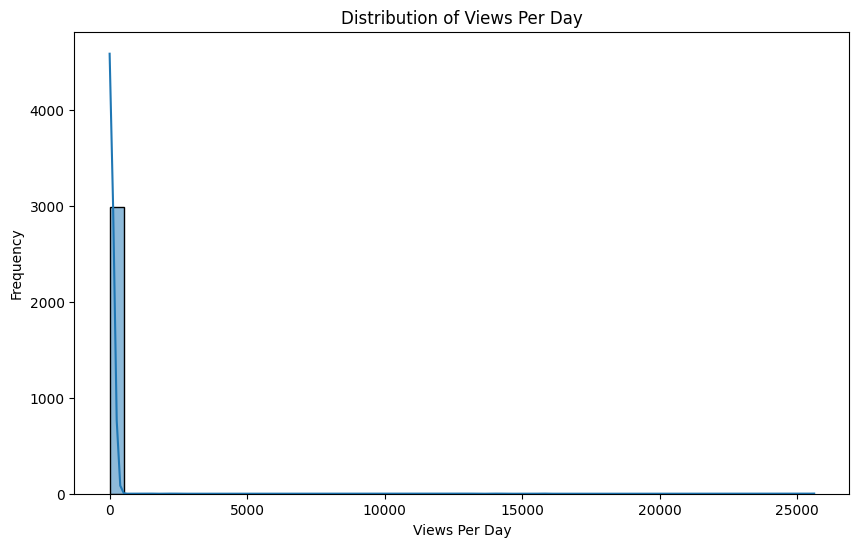

In [ ]:
# Plot the distribution of views_per_day
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['views_per_day'], kde=True, bins=50)
plt.title('Distribution of Views Per Day')
plt.xlabel('Views Per Day')
plt.ylabel('Frequency')
plt.show()


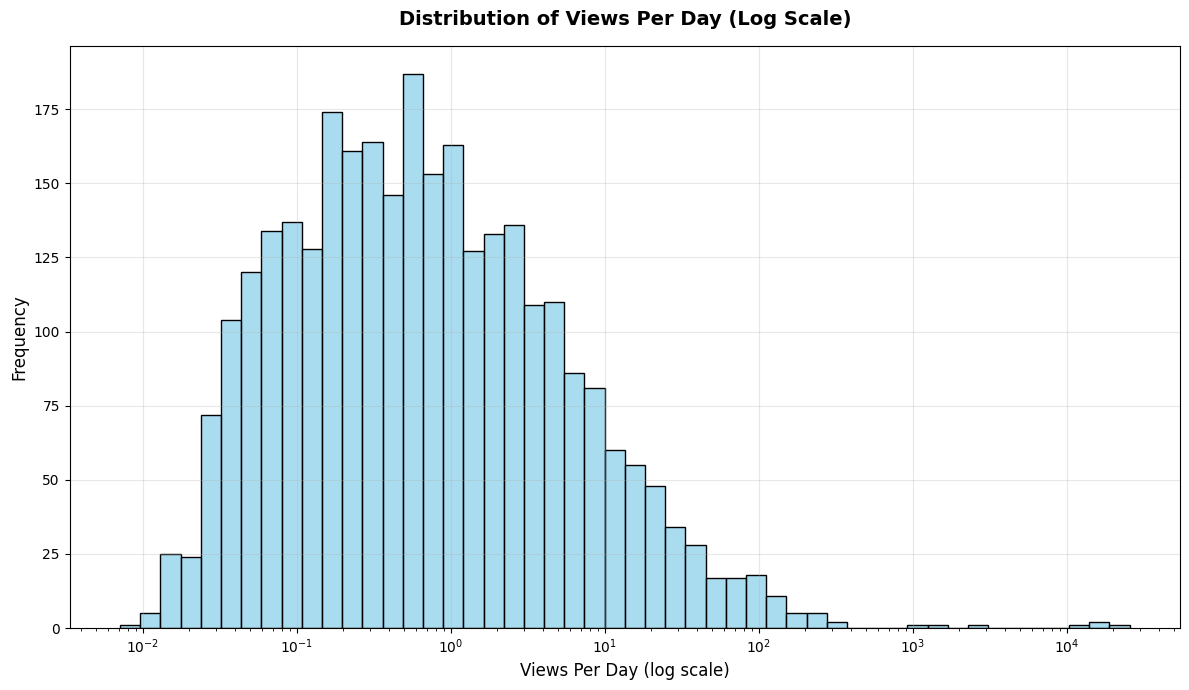

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of views_per_day with improvements
plt.figure(figsize=(12, 7))
plt.style.use('default')  # Use default style since seaborn style is causing errors

# Log transform the data and create histogram
sns.histplot(data=df, x='views_per_day', log_scale=True, bins=50,
             color='skyblue', edgecolor='black', alpha=0.7)

# Customize the plot
plt.title('Distribution of Views Per Day (Log Scale)', pad=15, fontsize=14, fontweight='bold')
plt.xlabel('Views Per Day (log scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add thousand separator to y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Tight layout to prevent label cutoff
plt.tight_layout()

plt.show()

#### 2.1.1.2 Engagement Rate


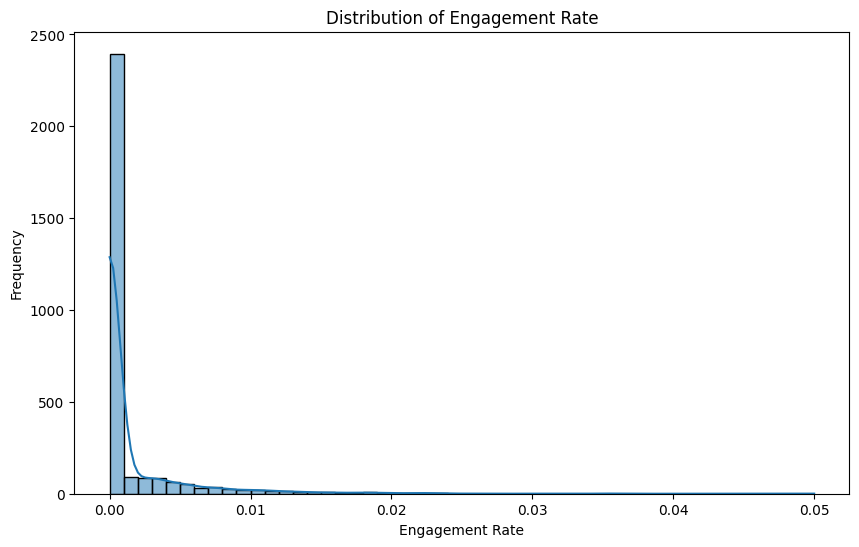

In [ ]:
# Plot the distribution of engagement rate
plt.figure(figsize=(10, 6))
sns.histplot(df['engagement_rate'], kde=True, bins=50)
plt.title('Distribution of Engagement Rate')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.show()


c:\Users\Essi_ASUS_STRIX\anaconda3\envs\Unit2\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\Essi_ASUS_STRIX\AppData\Local\Temp\ipykernel_35868\1824013899.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df['engagement_rate'], color='navy', linewidth=2, alpha=0.5)


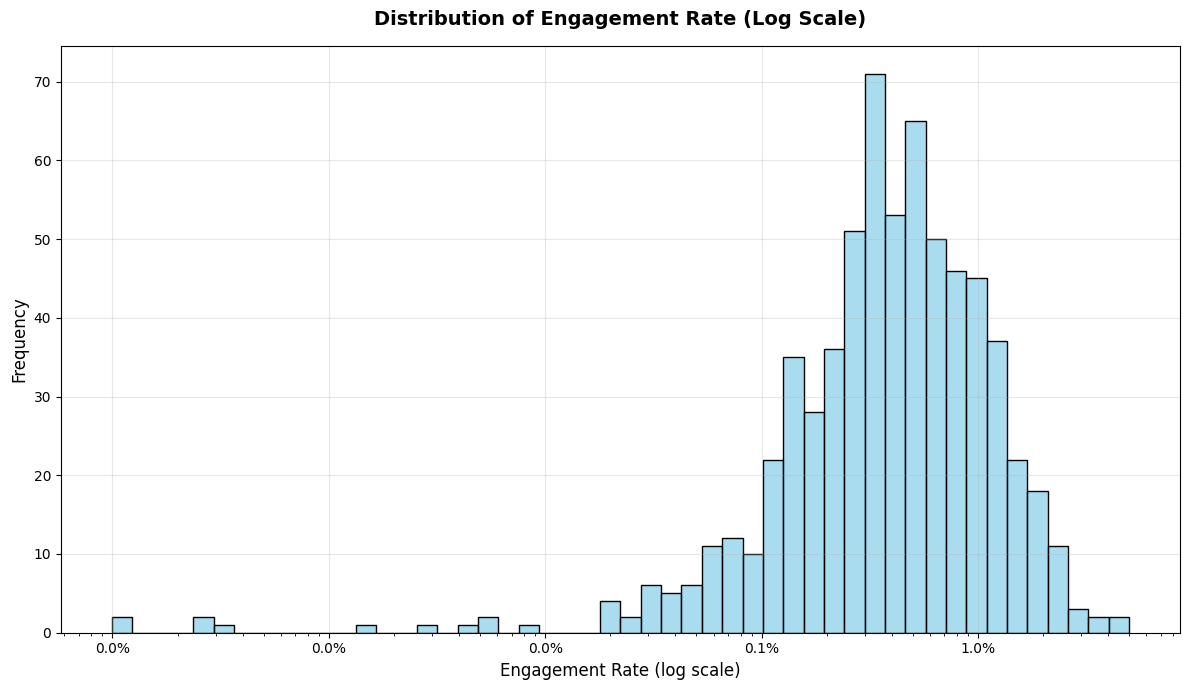

In [ ]:
# Plot the distribution of engagement rate with improvements
plt.figure(figsize=(12, 7))
plt.style.use('default')

# Create histogram with log transformation
sns.histplot(data=df, x='engagement_rate', log_scale=True, bins=50,
             color='skyblue', edgecolor='black', alpha=0.7)

# Add KDE plot
sns.kdeplot(data=df['engagement_rate'], color='navy', linewidth=2, alpha=0.5)

# Customize the plot
plt.title('Distribution of Engagement Rate (Log Scale)', pad=15, fontsize=14, fontweight='bold')
plt.xlabel('Engagement Rate (log scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Format y-axis with thousand separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add percentage format to x-axis
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1%}'))

# Tight layout to prevent label cutoff
plt.tight_layout()

plt.show()

## 2.2 Feature Distributions

### 2.2.1 Numerical Features


In [ ]:
# Investigate all values in favorites and tag_count features to see if they are all zero

# Check unique values and their counts for favorites and tag_count
print("Favorites value counts:")
print(df['favorites'].value_counts())
print("\nFavorites summary statistics:")
print(df['favorites'].describe())

print("\nTag count value counts:")
print(df['tag_count'].value_counts())
print("\nTag count summary statistics:")
print(df['tag_count'].describe())

# Check if all values are zero
print("\nAre all favorites zero?", (df['favorites'] == 0).all())
print("Are all tag_count zero?", (df['tag_count'] == 0).all())

# If they're all zero, we should consider dropping these columns as they don't provide any information
if (df['favorites'] == 0).all():
    df = df.drop('favorites', axis=1)
    print("\nDropped favorites column as all values were zero")

if (df['tag_count'] == 0).all():
    df = df.drop('tag_count', axis=1)
    print("Dropped tag_count column as all values were zero")


Favorites value counts:
favorites
0    2993
Name: count, dtype: int64

Favorites summary statistics:
count    2993.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: favorites, dtype: float64

Tag count value counts:
tag_count
0    2993
Name: count, dtype: int64

Tag count summary statistics:
count    2993.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: tag_count, dtype: float64

Are all favorites zero? True
Are all tag_count zero? True

Dropped favorites column as all values were zero
Dropped tag_count column as all values were zero


In [ ]:
# Get numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns


print(f"Number of numerical features: {len(numerical_features)}")
print("\nNumerical features:")
print(numerical_features.tolist())

Number of numerical features: 7

Numerical features:
['category_id', 'views', 'likes', 'comments', 'duration_seconds', 'engagement_rate', 'views_per_day']


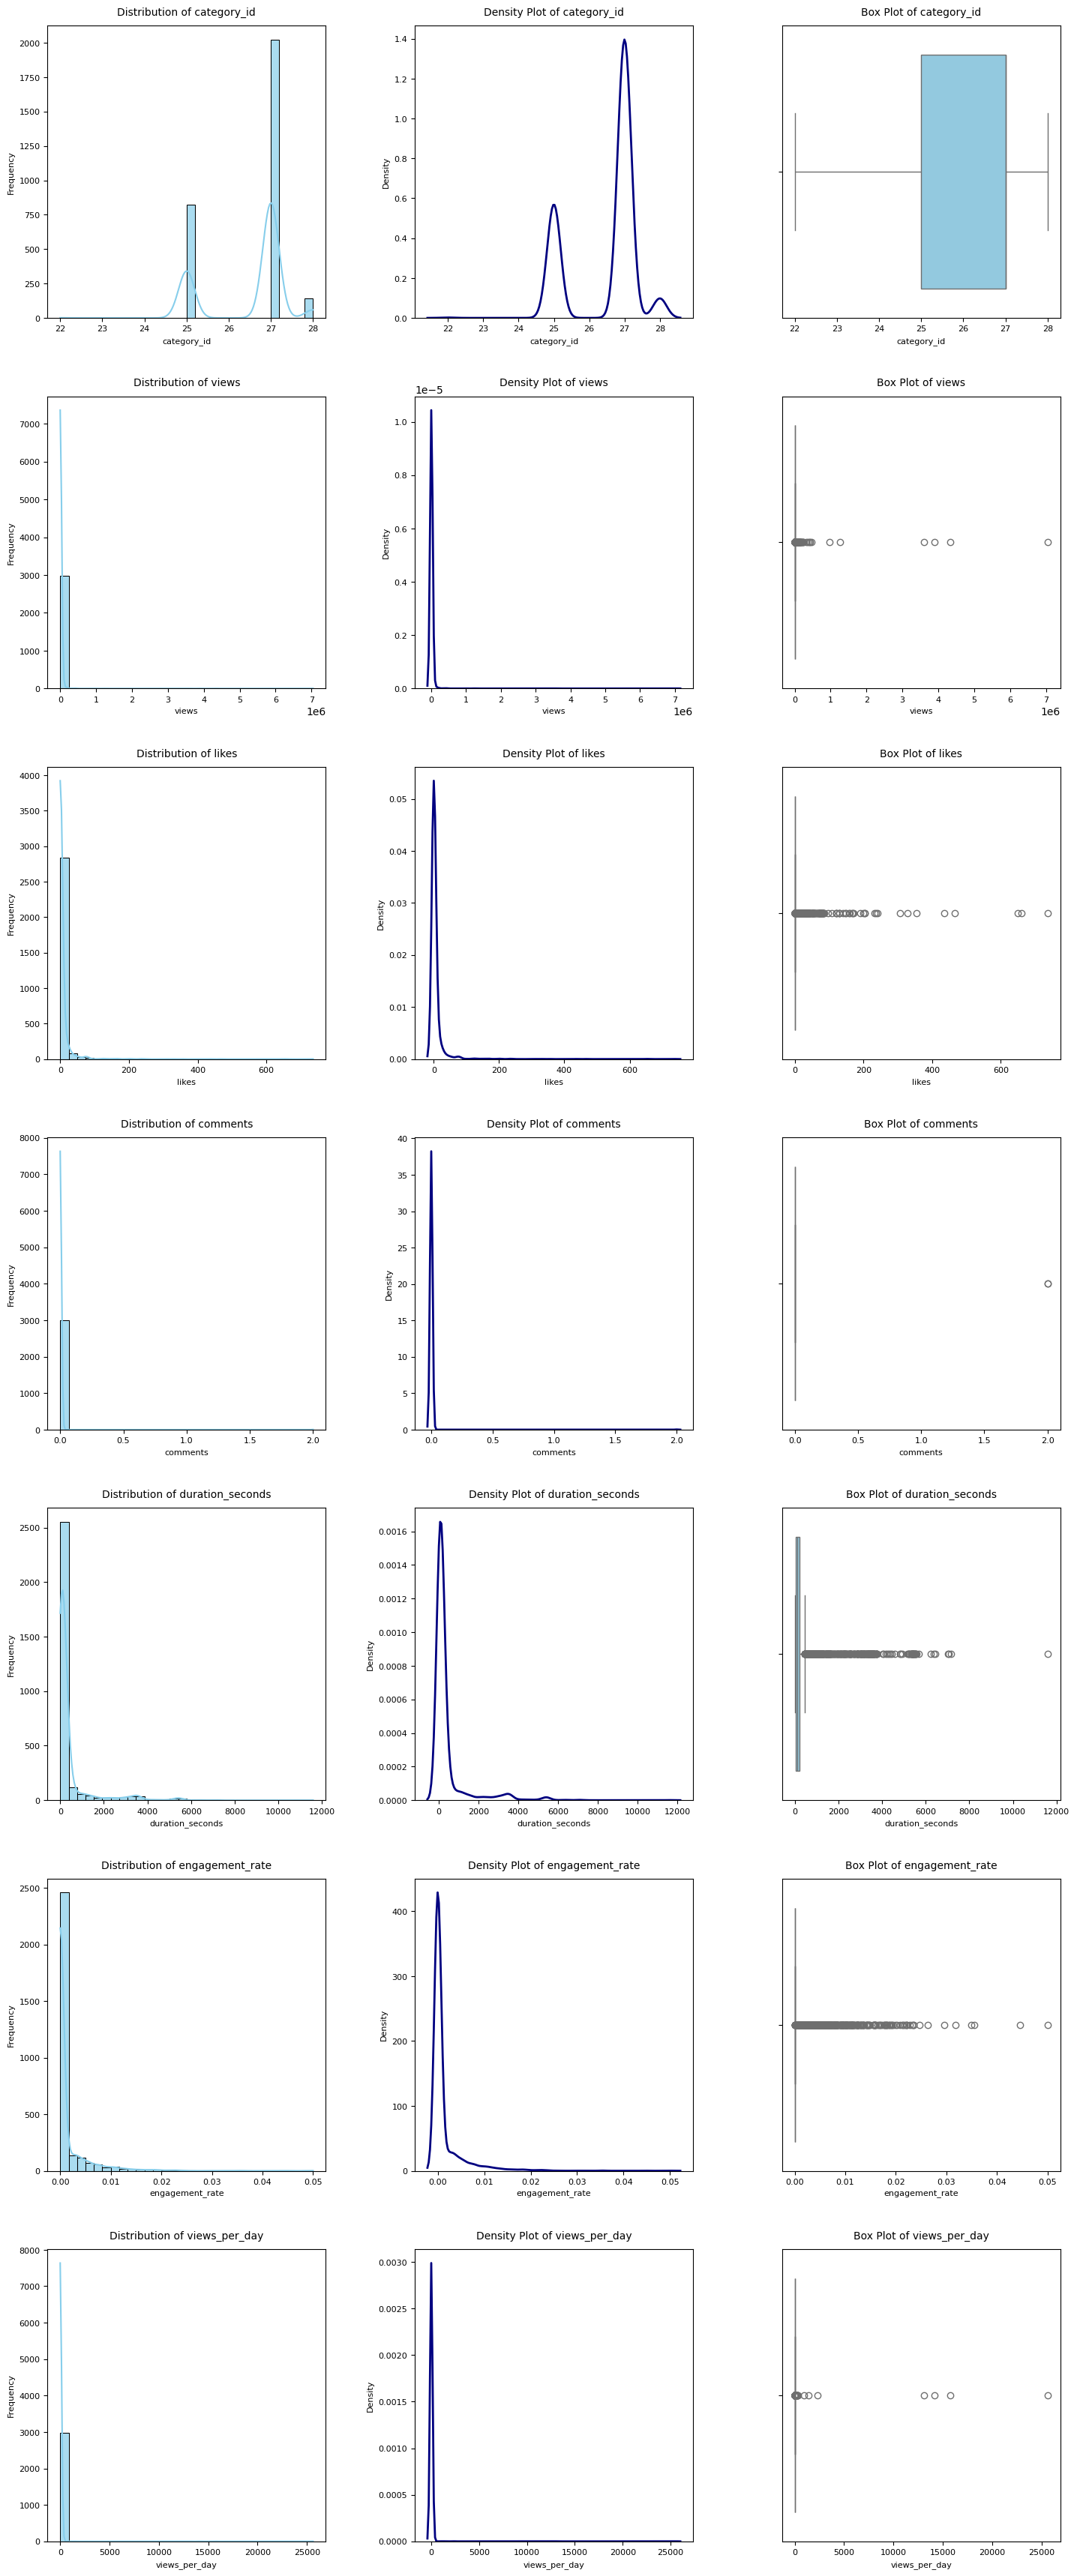

In [ ]:
# Plot histogram, box plot, and density plot for numerical features
# Create a figure with subplots for all numerical features
n_features = len(numerical_features)
fig = plt.figure(figsize=(15, 5*n_features))
plt.style.use('default')

for idx, feature in enumerate(numerical_features, 1):
    # Create three subplots for each feature
    plt.subplot(n_features, 3, (idx-1)*3 + 1)
    # Histogram with KDE
    sns.histplot(data=df, x=feature, bins=30, kde=True,
                color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {feature}', fontsize=10, pad=10)
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Density plot
    plt.subplot(n_features, 3, (idx-1)*3 + 2)
    sns.kdeplot(data=df[feature], color='navy', linewidth=2)
    plt.title(f'Density Plot of {feature}', fontsize=10, pad=10)
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('Density', fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Box plot
    plt.subplot(n_features, 3, (idx-1)*3 + 3)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Box Plot of {feature}', fontsize=10, pad=10)
    plt.xlabel(feature, fontsize=8)
    plt.xticks(fontsize=8)

# Adjust layout to prevent overlap
plt.tight_layout(pad=3.0)
plt.show()


## 2.3 Bivariate Analysis




### 2.3.1 Correlation Matrix


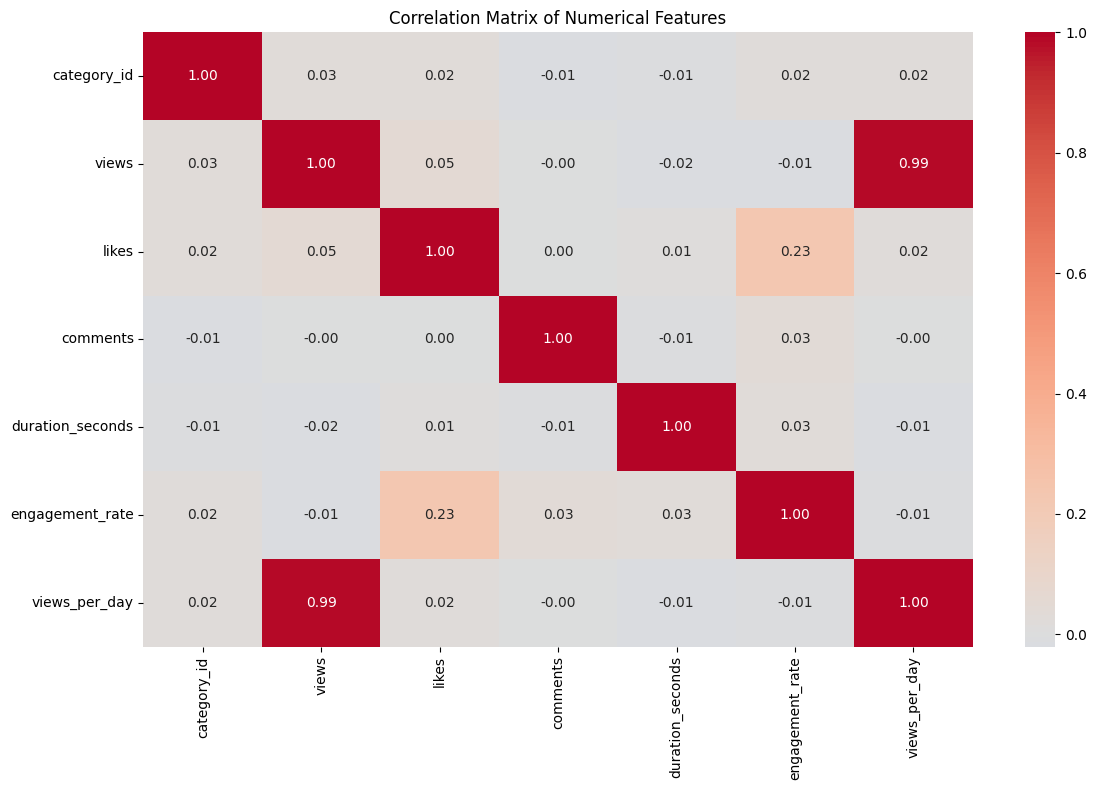


Top 5 correlated features with views_per_day:
views: 0.989
category_id: 0.020
likes: 0.017
duration_seconds: -0.015
engagement_rate: -0.011


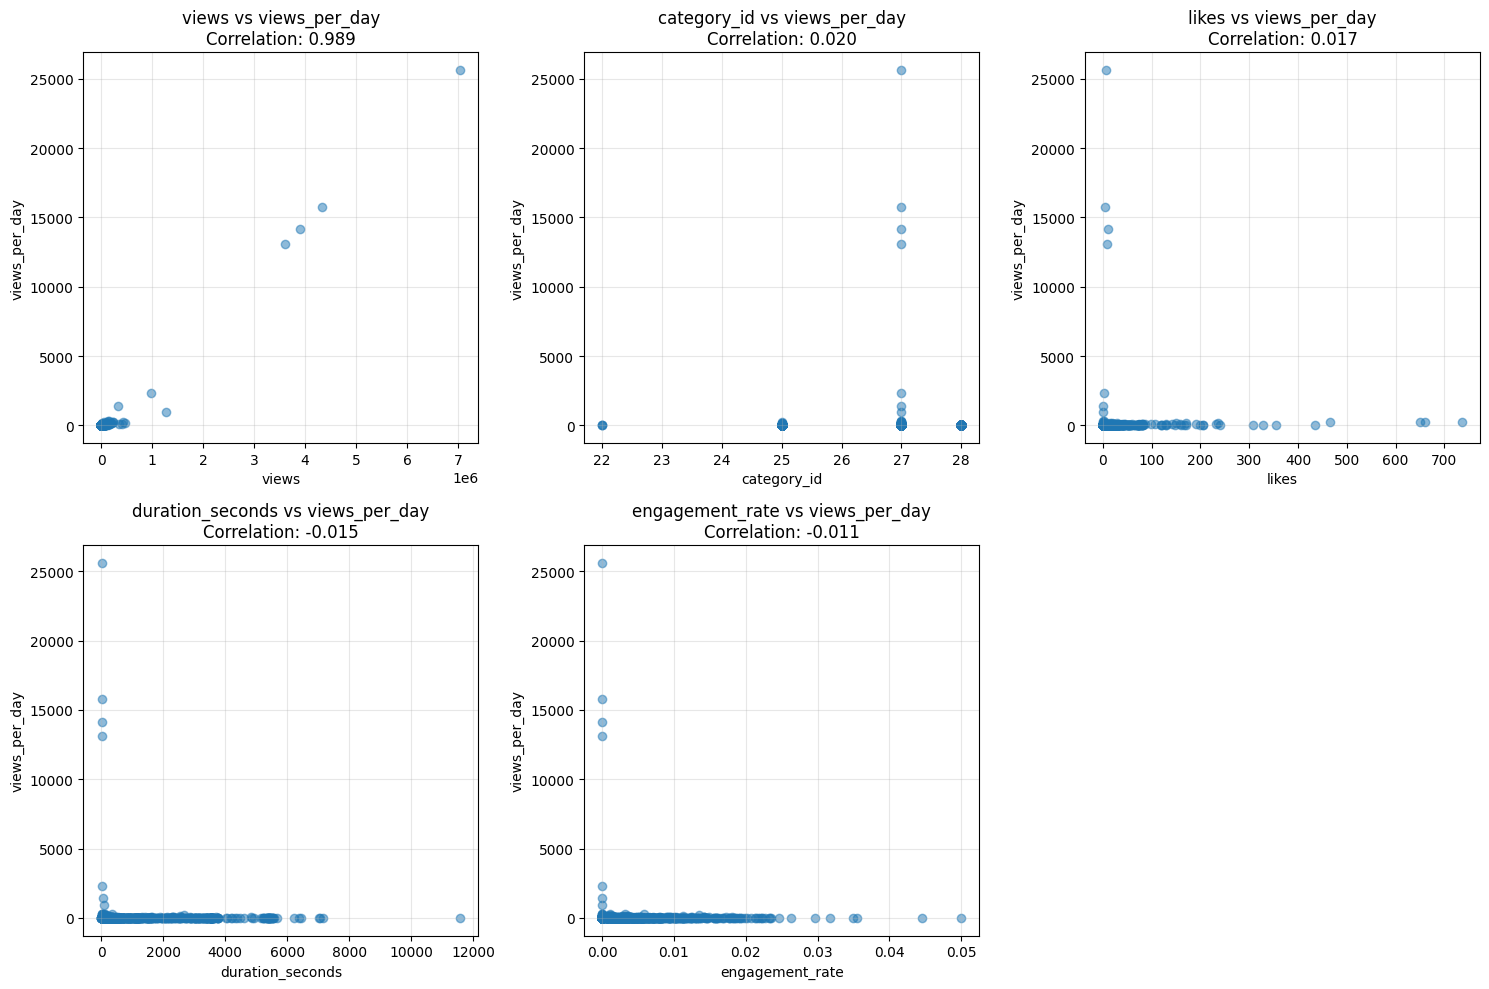


Top 5 correlated features with engagement_rate:
likes: 0.230
comments: 0.033
duration_seconds: 0.031
category_id: 0.022
views: -0.014


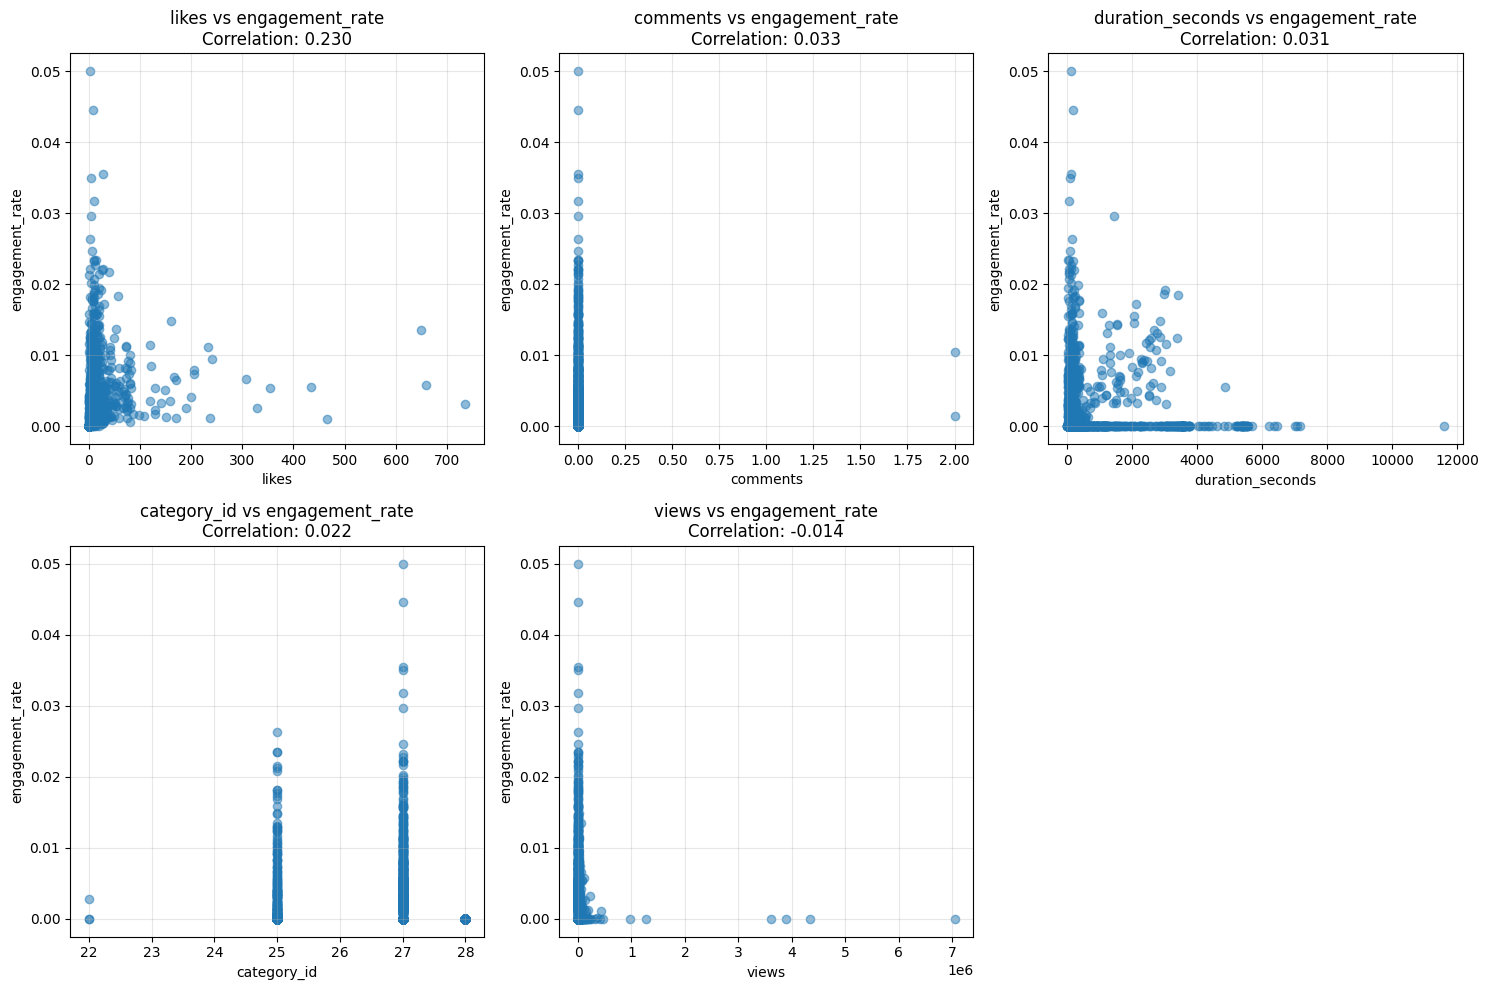

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Create correlation matrix
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_features].corr()

# Plot correlation matrix using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Find top 5 correlated features for each target variable
target_vars = ['views_per_day', 'engagement_rate']

for target in target_vars:
    # Get correlations with target and sort by absolute value
    correlations = correlation_matrix[target].abs().sort_values(ascending=False)

    # Remove self-correlation and get top 5
    top_5 = correlations[correlations.index != target][:5]

    print(f"\nTop 5 correlated features with {target}:")
    for feature, corr in top_5.items():
        print(f"{feature}: {correlation_matrix[target][feature]:.3f}")  # Print actual correlation (not absolute)

    # Create scatter plots for top 5 correlations
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(top_5.index, 1):
        plt.subplot(2, 3, i)
        plt.scatter(df[feature], df[target], alpha=0.5)
        plt.title(f'{feature} vs {target}\nCorrelation: {correlation_matrix[target][feature]:.3f}')
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [ ]:
# Drop 'views' due to high collinearity with views_per_day
df = df.drop('views', axis=1)

# Get updated numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

print(f"Number of numerical features: {len(numerical_features)}")
print("\nNumerical features:")
print(numerical_features.tolist())

Number of numerical features: 6

Numerical features:
['category_id', 'likes', 'comments', 'duration_seconds', 'engagement_rate', 'views_per_day']


## 2.4 Features Encoding/Removal



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   video_id               2993 non-null   category      
 1   title                  2993 non-null   category      
 2   description            2993 non-null   category      
 3   published_at           2993 non-null   datetime64[ns]
 4   thumbnails             2993 non-null   category      
 5   tags                   2993 non-null   category      
 6   category_id            2993 non-null   int64         
 7   definition             2993 non-null   category      
 8   caption                2993 non-null   bool          
 9   licensed_content       2993 non-null   bool          
 10  projection             2993 non-null   category      
 11  likes                  2993 non-null   int64         
 12  comments               2993 non-null   int64         
 13  pri

In [ ]:
# 1. Drop irrelevant/redundant features
features_to_drop = [
    'video_id',          # Identifier
    'thumbnails',        # URL data
    'embed_html',        # HTML code
    'tags',              # Empty lists
    'topic_categories',  # URL data
    'title',            # Text data, not relevant for regression
    'description'       # Text data, not relevant for regression
]

# 2. Process remaining features
df_processed = df.copy()

# Drop irrelevant features
df_processed = df_processed.drop(features_to_drop, axis=1)

# Convert boolean features to integer
boolean_features = ['caption', 'licensed_content']
for col in boolean_features:
    df_processed[col] = df_processed[col].astype(int)

# One-hot encoding for all categorical features
categorical_features = [
    'definition',           # (hd/sd)
    'video_length_category',# (Extended, etc.)
    'publish_dayofweek',    # (Monday-Sunday)
    'domain',               # (TAX, etc.)
    'country',             # (CA, etc.)
    'channel',             # Channel names
    'projection',          # Added: projection type
    'privacy_status',      # Added: privacy status
    'license'              # Added: license type
]

# Create datetime features and drop original
df_processed['publish_month'] = df_processed['published_at'].dt.month
df_processed['publish_day'] = df_processed['published_at'].dt.day
df_processed['publish_dayofweek_num'] = df_processed['published_at'].dt.dayofweek
df_processed = df_processed.drop('published_at', axis=1)

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_processed, columns=categorical_features)

# Print final features and shape
print("Final features:")
print(df_encoded.columns.tolist())
print("\nFinal shape:", df_encoded.shape)

Final features:
['category_id', 'caption', 'licensed_content', 'likes', 'comments', 'duration_seconds', 'engagement_rate', 'views_per_day', 'publish_month', 'publish_day', 'publish_dayofweek_num', 'definition_hd', 'definition_sd', 'video_length_category_Extended (15min+)', 'video_length_category_Long (5-15min)', 'video_length_category_Medium (1-5min)', 'video_length_category_Short (0-1min)', 'publish_dayofweek_Friday', 'publish_dayofweek_Monday', 'publish_dayofweek_Saturday', 'publish_dayofweek_Sunday', 'publish_dayofweek_Thursday', 'publish_dayofweek_Tuesday', 'publish_dayofweek_Wednesday', 'domain_HEALTH', 'domain_SERVICE', 'domain_TAX', 'country_AUS', 'country_CA', 'country_NZ', 'country_UK', 'channel_AusTaxOffice', 'channel_InlandRevenueNZ', 'channel_ServicesAustralia', 'channel_canrevagency', 'channel_healthgovau', 'channel_hmrcgovuk', 'projection_rectangular', 'privacy_status_public', 'license_youtube']

Final shape: (2993, 40)


In [ ]:
print(df_encoded.head(2))

   category_id  caption  licensed_content  likes  comments  duration_seconds  \
0           27        1                 0      4         0              1432   
1           27        1                 0      2         0              1224   

   engagement_rate  views_per_day  publish_month  publish_day  ...  \
0         0.029630       4.500000             10            8  ...   
1         0.013158       4.222222             10            2  ...   

   country_UK  channel_AusTaxOffice  channel_InlandRevenueNZ  \
0       False                 False                    False   
1       False                 False                    False   

   channel_ServicesAustralia  channel_canrevagency  channel_healthgovau  \
0                      False                  True                False   
1                      False                  True                False   

   channel_hmrcgovuk  projection_rectangular  privacy_status_public  \
0              False                    True              

## 2.5 Split, Transformation, and Scaling

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import RobustScaler

# 1. Separate features and targets
X = df_encoded.drop(['views_per_day', 'engagement_rate'], axis=1)
y_views = df_encoded['views_per_day']
y_engagement = df_encoded['engagement_rate']

# 2. First split: separate test set
X_train_val, X_test, y_views_train_val, y_views_test, y_eng_train_val, y_eng_test = train_test_split(
    X, y_views, y_engagement, test_size=0.2, random_state=42
)

# 3. Second split: separate validation set
X_train, X_val, y_views_train, y_views_val, y_eng_train, y_eng_val = train_test_split(
    X_train_val, y_views_train_val, y_eng_train_val, test_size=0.25, random_state=42
)

# 4. Log transformation for right-skewed features
log_transform_features = ['likes', 'comments', 'duration_seconds']
for feature in log_transform_features:
    # Fit and transform on training data
    X_train[f'{feature}_log'] = np.log1p(X_train[feature])
    # Transform validation and test data
    X_val[f'{feature}_log'] = np.log1p(X_val[feature])
    X_test[f'{feature}_log'] = np.log1p(X_test[feature])
    # Drop original columns
    X_train = X_train.drop(feature, axis=1)
    X_val = X_val.drop(feature, axis=1)
    X_test = X_test.drop(feature, axis=1)

# 5. Log transformation for target variables
y_views_train_log = np.log1p(y_views_train)
y_views_val_log = np.log1p(y_views_val)
y_views_test_log = np.log1p(y_views_test)

y_eng_train_log = np.log1p(y_eng_train)
y_eng_val_log = np.log1p(y_eng_val)
y_eng_test_log = np.log1p(y_eng_test)

# 6. Cyclical encoding for datetime features
def create_cyclical_features(df, col, period):
    df[f'{col}_sin'] = np.sin(2 * np.pi * df[col]/period)
    df[f'{col}_cos'] = np.cos(2 * np.pi * df[col]/period)
    return df

# Apply to all splits
for df in [X_train, X_val, X_test]:
    df = create_cyclical_features(df, 'publish_month', 12)
    df = create_cyclical_features(df, 'publish_day', 31)
    df = df.drop(['publish_month', 'publish_day'], axis=1)

# 7. Scaling
features_to_scale = [
    'category_id',
    'likes_log',
    'comments_log',
    'duration_seconds_log',
    'publish_month_sin', 'publish_month_cos',
    'publish_day_sin', 'publish_day_cos'
]

scaler = RobustScaler()
# Fit on training data only
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
# Transform validation and test data
X_val[features_to_scale] = scaler.transform(X_val[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

print("Shapes after processing:")
print("Training:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Shapes after processing:
Training: (1795, 42)
Validation: (599, 42)
Test: (599, 42)


### 2.5.1 Save Results of Preprocessing


In [ ]:
import pickle
import joblib
from datetime import datetime
import os

# Specify the base directory
base_dir = r"C:\Users\Essi_ASUS_STRIX\Desktop\Unit-3\Coding\Saved_Models_Data"

# Create subdirectories
data_dir = os.path.join(base_dir, 'data', 'processed')
models_dir = os.path.join(base_dir, 'models')

# Create directories if they don't exist
os.makedirs(data_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)

# Create timestamp
timestamp = datetime.now().strftime('%Y%m%d_%H%M')

# 1. Save the processed datasets
# Training set
joblib.dump(X_train, os.path.join(data_dir, f'X_train_{timestamp}.joblib'))
joblib.dump(y_views_train_log, os.path.join(data_dir, f'y_views_train_{timestamp}.joblib'))
joblib.dump(y_eng_train_log, os.path.join(data_dir, f'y_eng_train_{timestamp}.joblib'))

# Validation set
joblib.dump(X_val, os.path.join(data_dir, f'X_val_{timestamp}.joblib'))
joblib.dump(y_views_val_log, os.path.join(data_dir, f'y_views_val_{timestamp}.joblib'))
joblib.dump(y_eng_val_log, os.path.join(data_dir, f'y_eng_val_{timestamp}.joblib'))

# Test set
joblib.dump(X_test, os.path.join(data_dir, f'X_test_{timestamp}.joblib'))
joblib.dump(y_views_test_log, os.path.join(data_dir, f'y_views_test_{timestamp}.joblib'))
joblib.dump(y_eng_test_log, os.path.join(data_dir, f'y_eng_test_{timestamp}.joblib'))

# 2. Save the scaler
joblib.dump(scaler, os.path.join(models_dir, f'scaler_{timestamp}.joblib'))

# 3. Save feature names
feature_names = {
    'X_features': X_train.columns.tolist(),
    'log_transform_features': log_transform_features,
    'features_to_scale': features_to_scale
}
with open(os.path.join(data_dir, f'feature_names_{timestamp}.pkl'), 'wb') as f:
    pickle.dump(feature_names, f)

print("Files saved in:")
print(f"Data directory: {data_dir}")
print(f"Models directory: {models_dir}")
print("\nSaved files:")
print(f"- Training data: X_train_{timestamp}.joblib, y_views_train_{timestamp}.joblib, y_eng_train_{timestamp}.joblib")
print(f"- Validation data: X_val_{timestamp}.joblib, y_views_val_{timestamp}.joblib, y_eng_val_{timestamp}.joblib")
print(f"- Test data: X_test_{timestamp}.joblib, y_views_test_{timestamp}.joblib, y_eng_test_{timestamp}.joblib")
print(f"- Scaler: scaler_{timestamp}.joblib")
print(f"- Feature names: feature_names_{timestamp}.pkl")

Files saved in:
Data directory: C:\Users\Essi_ASUS_STRIX\Desktop\Unit-3\Coding\Saved_Models_Data\data\processed
Models directory: C:\Users\Essi_ASUS_STRIX\Desktop\Unit-3\Coding\Saved_Models_Data\models

Saved files:
- Training data: X_train_20241106_1736.joblib, y_views_train_20241106_1736.joblib, y_eng_train_20241106_1736.joblib
- Validation data: X_val_20241106_1736.joblib, y_views_val_20241106_1736.joblib, y_eng_val_20241106_1736.joblib
- Test data: X_test_20241106_1736.joblib, y_views_test_20241106_1736.joblib, y_eng_test_20241106_1736.joblib
- Scaler: scaler_20241106_1736.joblib
- Feature names: feature_names_20241106_1736.pkl


# 3. Machine Learning

## 3.1 Load Data

In [ ]:
import joblib
import pickle
import os

# Specify the base directory and timestamp
base_dir = r"C:\Users\Essi_ASUS_STRIX\Desktop\Unit-3\Coding\Saved_Models_Data"
timestamp = "20241106_1736"  # Your saved timestamp

# Define directories
data_dir = os.path.join(base_dir, 'data', 'processed')
models_dir = os.path.join(base_dir, 'models')

# 1. Load feature sets
X_train = joblib.load(os.path.join(data_dir, f'X_train_{timestamp}.joblib'))
X_val = joblib.load(os.path.join(data_dir, f'X_val_{timestamp}.joblib'))
X_test = joblib.load(os.path.join(data_dir, f'X_test_{timestamp}.joblib'))

# 2. Load target variables
# Views per day
y_views_train = joblib.load(os.path.join(data_dir, f'y_views_train_{timestamp}.joblib'))
y_views_val = joblib.load(os.path.join(data_dir, f'y_views_val_{timestamp}.joblib'))
y_views_test = joblib.load(os.path.join(data_dir, f'y_views_test_{timestamp}.joblib'))

# Engagement rate
y_eng_train = joblib.load(os.path.join(data_dir, f'y_eng_train_{timestamp}.joblib'))
y_eng_val = joblib.load(os.path.join(data_dir, f'y_eng_val_{timestamp}.joblib'))
y_eng_test = joblib.load(os.path.join(data_dir, f'y_eng_test_{timestamp}.joblib'))

# 3. Load scaler and feature names
scaler = joblib.load(os.path.join(models_dir, f'scaler_{timestamp}.joblib'))
with open(os.path.join(data_dir, f'feature_names_{timestamp}.pkl'), 'rb') as f:
    feature_names = pickle.load(f)

# 4. Verify data shapes
print("Data Shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"X_test: {X_test.shape}")
print(f"\ny_views_train: {y_views_train.shape}")
print(f"y_views_val: {y_views_val.shape}")
print(f"y_views_test: {y_views_test.shape}")
print(f"\ny_eng_train: {y_eng_train.shape}")
print(f"y_eng_val: {y_eng_val.shape}")
print(f"y_eng_test: {y_eng_test.shape}")

# 5. Display feature information
print("\nFeature Names:")
print("X features:", len(feature_names['X_features']))
print("Log-transformed features:", feature_names['log_transform_features'])
print("Scaled features:", feature_names['features_to_scale'])

Data Shapes:
X_train: (1795, 42)
X_val: (599, 42)
X_test: (599, 42)

y_views_train: (1795,)
y_views_val: (599,)
y_views_test: (599,)

y_eng_train: (1795,)
y_eng_val: (599,)
y_eng_test: (599,)

Feature Names:
X features: 42
Log-transformed features: ['likes', 'comments', 'duration_seconds']
Scaled features: ['category_id', 'likes_log', 'comments_log', 'duration_seconds_log', 'publish_month_sin', 'publish_month_cos', 'publish_day_sin', 'publish_day_cos']


## 3.2 Baseline Modelling

Training and evaluating models for views prediction...


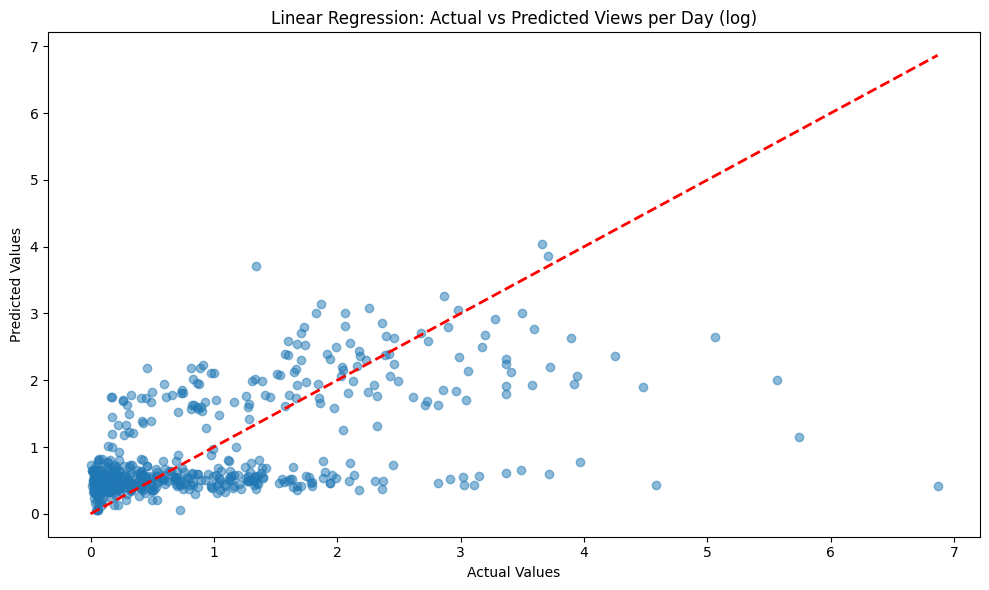

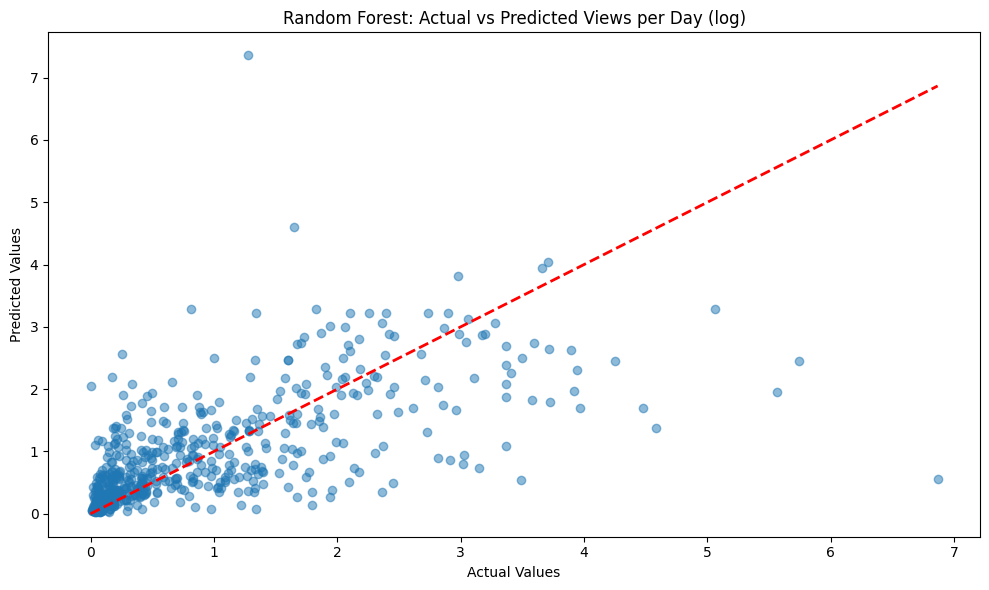

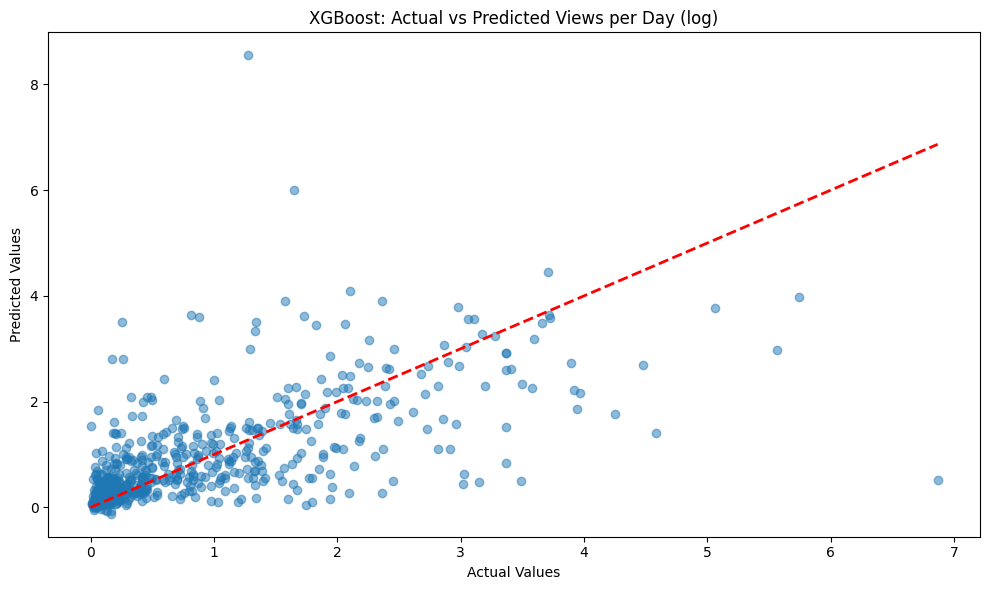


Training and evaluating models for engagement prediction...


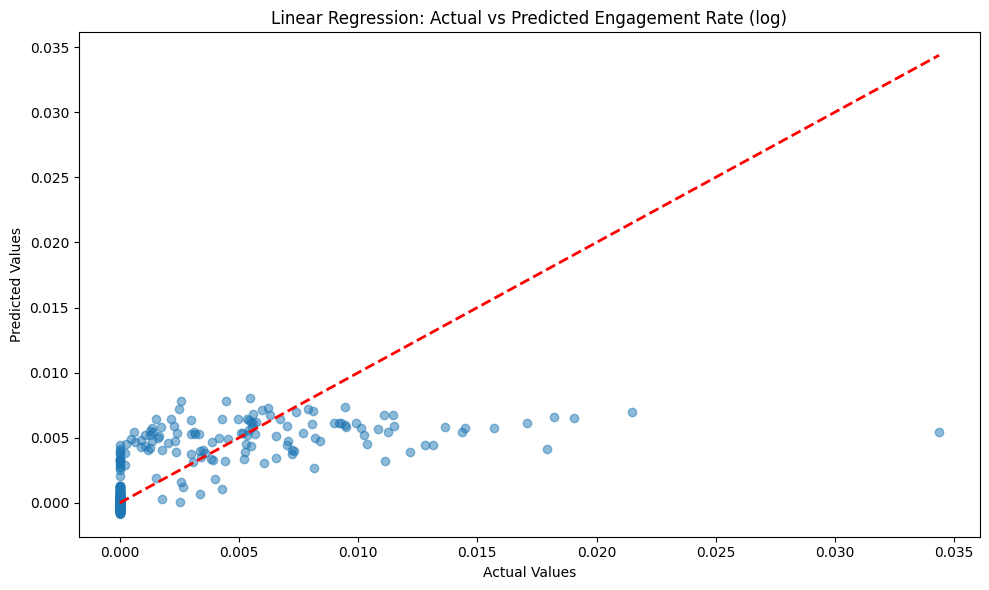

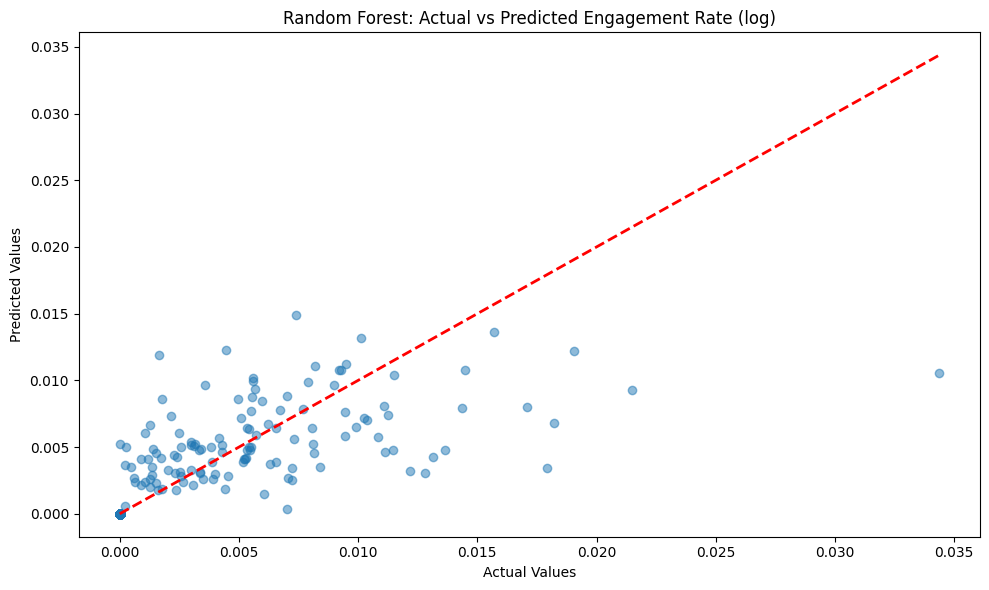

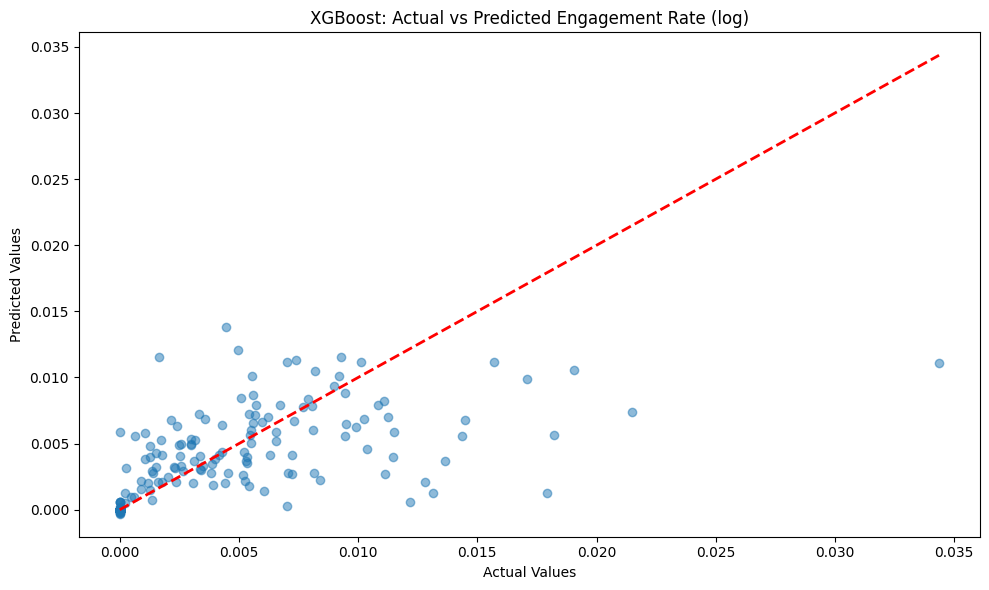


Views Prediction Results:
               Model  R2 Score     MSE    RMSE     MAE
0  Linear Regression    0.3404  0.7088  0.8419  0.5710
1      Random Forest    0.3946  0.6506  0.8066  0.4858
2            XGBoost    0.3234  0.7271  0.8527  0.4920

Engagement Prediction Results:
               Model  R2 Score  MSE    RMSE     MAE
0  Linear Regression    0.5101  0.0  0.0024  0.0010
1      Random Forest    0.6170  0.0  0.0021  0.0007
2            XGBoost    0.5619  0.0  0.0023  0.0007


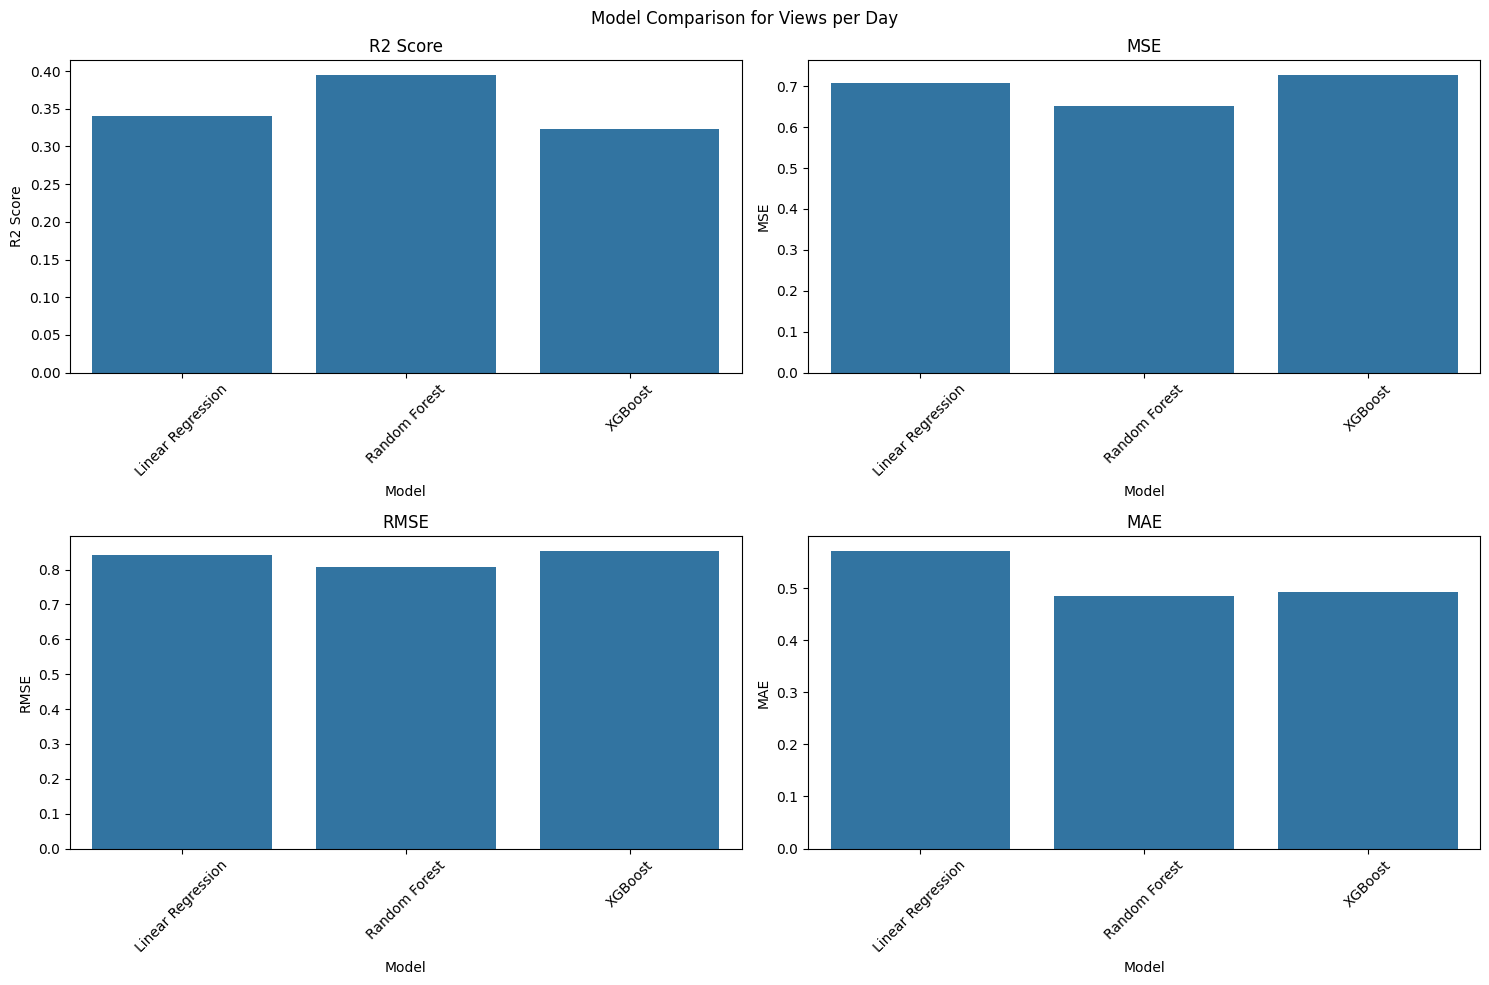

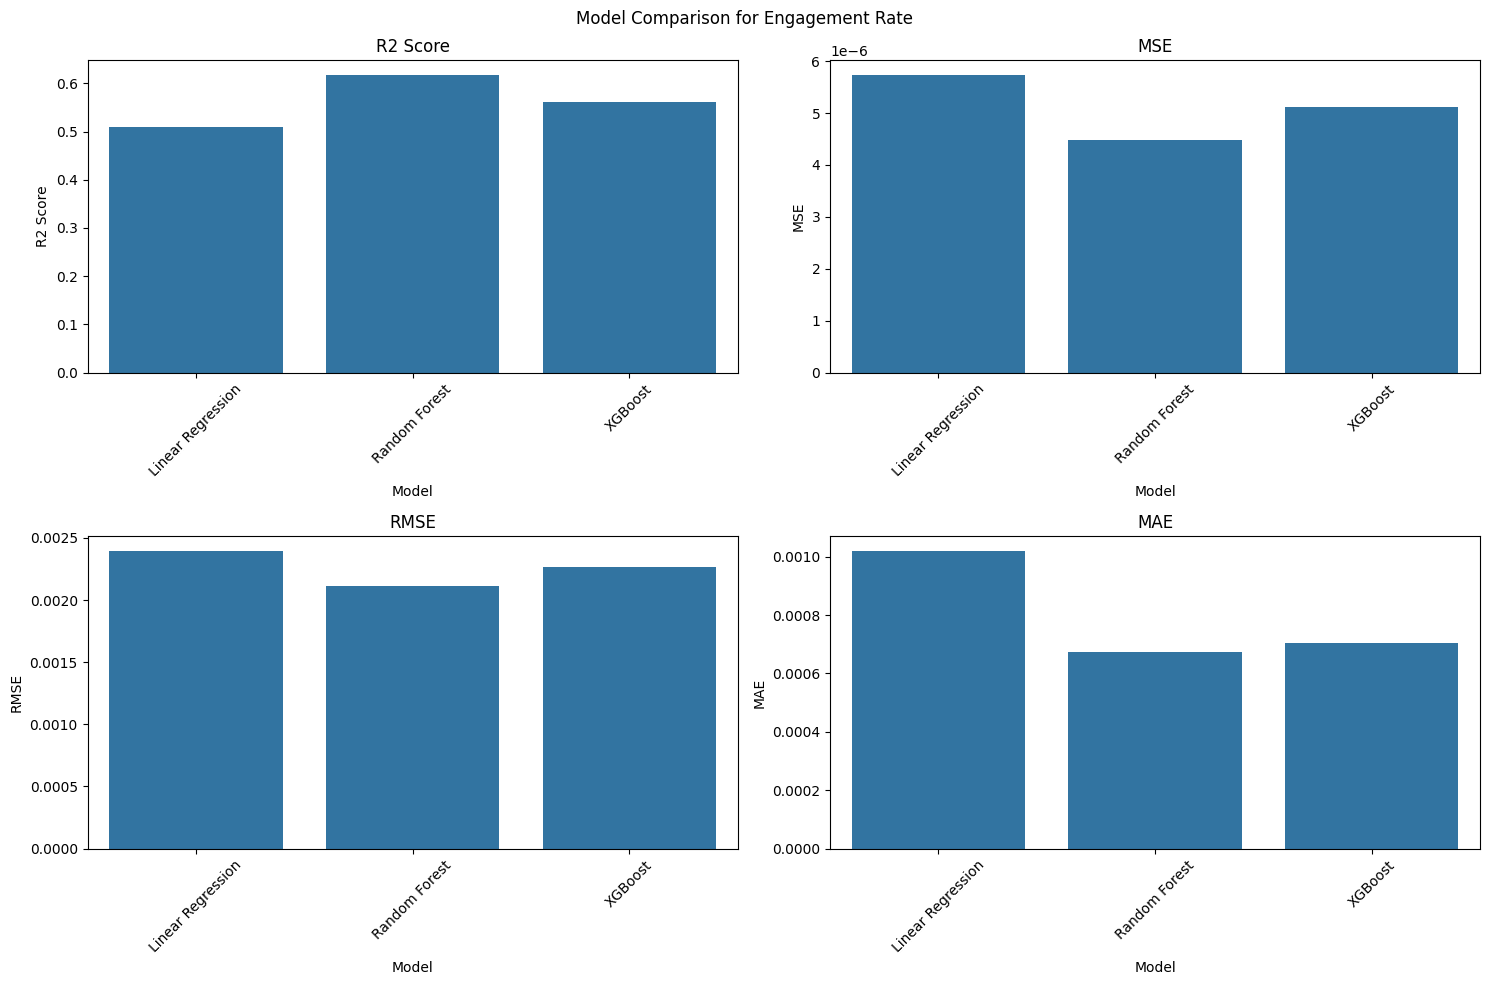

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    return {
        'Model': model_name,
        'R2 Score': r2,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae
    }

# Function to plot actual vs predicted values
def plot_predictions(y_true, y_pred, model_name, target_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name}: Actual vs Predicted {target_name}')
    plt.tight_layout()
    plt.show()

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Lists to store results
views_results = []
engagement_results = []

# Train and evaluate models for views prediction
print("Training and evaluating models for views prediction...")
for name, model in models.items():
    # Train model
    model.fit(X_train, y_views_train)

    # Make predictions
    y_pred = model.fit(X_train, y_views_train).predict(X_val)

    # Evaluate
    results = evaluate_model(y_views_val, y_pred, name)
    views_results.append(results)

    # Plot
    plot_predictions(y_views_val, y_pred, name, 'Views per Day (log)')

# Train and evaluate models for engagement prediction
print("\nTraining and evaluating models for engagement prediction...")
for name, model in models.items():
    # Train model
    model.fit(X_train, y_eng_train)

    # Make predictions
    y_pred = model.fit(X_train, y_eng_train).predict(X_val)

    # Evaluate
    results = evaluate_model(y_eng_val, y_pred, name)
    engagement_results.append(results)

    # Plot
    plot_predictions(y_eng_val, y_pred, name, 'Engagement Rate (log)')

# Create results DataFrames
views_df = pd.DataFrame(views_results)
engagement_df = pd.DataFrame(engagement_results)

# Display results
print("\nViews Prediction Results:")
print(views_df.round(4))
print("\nEngagement Prediction Results:")
print(engagement_df.round(4))

# Plot model comparison
def plot_model_comparison(results_df, target_name):
    metrics = ['R2 Score', 'MSE', 'RMSE', 'MAE']

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Model Comparison for {target_name}')

    for i, metric in enumerate(metrics):
        ax = axes[i//2, i%2]
        sns.barplot(x='Model', y=metric, data=results_df, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        ax.set_title(metric)

    plt.tight_layout()
    plt.show()

plot_model_comparison(views_df, 'Views per Day')
plot_model_comparison(engagement_df, 'Engagement Rate')

## 3.3 Bayesian Optimization

In [ ]:
import optuna
import logging
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Set Optuna's logging level to ERROR
optuna.logging.set_verbosity(optuna.logging.ERROR)

def objective_views(trial):
    # First determine bootstrap
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    params = {
        # Basic parameters
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0),

        # # Additional parameters
        # 'bootstrap': bootstrap,
        # 'criterion': trial.suggest_categorical('criterion', ['squared_error', 'absolute_error', 'poisson']),
        # 'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
        # 'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 2, 100),
        # 'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.2),

        # # Advanced parameters
        # 'oob_score': trial.suggest_categorical('oob_score', [True, False]) if bootstrap else False,
        # 'warm_start': trial.suggest_categorical('warm_start', [True, False]),
        # 'ccp_alpha': trial.suggest_float('ccp_alpha', 0.0, 1.0),
    }

    # Only add max_samples if bootstrap is True
    if bootstrap:
        params['max_samples'] = trial.suggest_float('max_samples', 0.1, 1.0)

    model = RandomForestRegressor(**params, random_state=42)
    model.fit(X_train, y_views_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_views_val, y_pred))

    return rmse

def objective_engagement(trial):
    # First determine bootstrap
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    params = {
        # Basic parameters
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0),

        # # Additional parameters
        # 'bootstrap': bootstrap,
        # 'criterion': trial.suggest_categorical('criterion', ['squared_error', 'absolute_error', 'poisson']),
        # 'min_weight_fraction_leaf': trial.suggest_float('min_weight_fraction_leaf', 0.0, 0.5),
        # 'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 2, 100),
        # 'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.2),

        # # Advanced parameters
        # 'oob_score': trial.suggest_categorical('oob_score', [True, False]) if bootstrap else False,
        # 'warm_start': trial.suggest_categorical('warm_start', [True, False]),
        # 'ccp_alpha': trial.suggest_float('ccp_alpha', 0.0, 1.0),
    }

    # Only add max_samples if bootstrap is True
    if bootstrap:
        params['max_samples'] = trial.suggest_float('max_samples', 0.1, 1.0)

    model = RandomForestRegressor(**params, random_state=42)
    model.fit(X_train, y_eng_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_eng_val, y_pred))

    return rmse

# Create and run studies
print("Optimizing for Views Prediction...")
study_views = optuna.create_study(direction='minimize')
study_views.optimize(objective_views, n_trials=50)

print("\nOptimizing for Engagement Rate Prediction...")
study_engagement = optuna.create_study(direction='minimize')
study_engagement.optimize(objective_engagement, n_trials=50)

# Create final models with best parameters
best_RF_views = RandomForestRegressor(**study_views.best_params, random_state=42)
best_RF_views.fit(X_train, y_views_train)
views_pred = best_RF_views.predict(X_val)

best_RF_eng = RandomForestRegressor(**study_engagement.best_params, random_state=42)
best_RF_eng.fit(X_train, y_eng_train)
engagement_pred = best_RF_eng.predict(X_val)

# Print results
print("\nBest parameters and results:")
print("\nViews Model:")
print("Parameters:", study_views.best_params)
print(f"R2 Score: {r2_score(y_views_val, views_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_views_val, views_pred)):.4f}")

print("\nEngagement Model:")
print("Parameters:", study_engagement.best_params)
print(f"R2 Score: {r2_score(y_eng_val, engagement_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_eng_val, engagement_pred)):.4f}")

Optimizing for Views Prediction...

Optimizing for Engagement Rate Prediction...

Best parameters and results:

Views Model:
Parameters: {'bootstrap': True, 'n_estimators': 236, 'max_depth': 25, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': 0.5518019271112343, 'max_samples': 0.9921903659466058}
R2 Score: 0.4539
RMSE: 0.7661

Engagement Model:
Parameters: {'bootstrap': True, 'n_estimators': 101, 'max_depth': 21, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.17550582499567208, 'max_samples': 0.5211638543924302}
R2 Score: 0.6344
RMSE: 0.0021


**Optimization Results vs Baseline**

**Views Prediction:**
- R2: 0.4539 (Optimized) vs 0.3946 (Baseline) → **+5.93% improvement**
- RMSE: 0.7661 (Optimized) vs 0.8066 (Baseline) → **5.02% error reduction**

**Engagement Prediction:**
- R2: 0.6344 (Optimized) vs 0.6170 (Baseline) → **+1.74% improvement**
- RMSE: 0.0021 (Both) → **No change**

**Key Findings:**
- Optimization more effective for views prediction
- Views model: More trees (236), deeper (25), large sample size (99%)
- Engagement model: Fewer trees (101), still deep (21), smaller sample size (52%)
- Both models benefit from bootstrap sampling

**Recommendation:** Use optimized model for views prediction; either model suitable for engagement prediction.

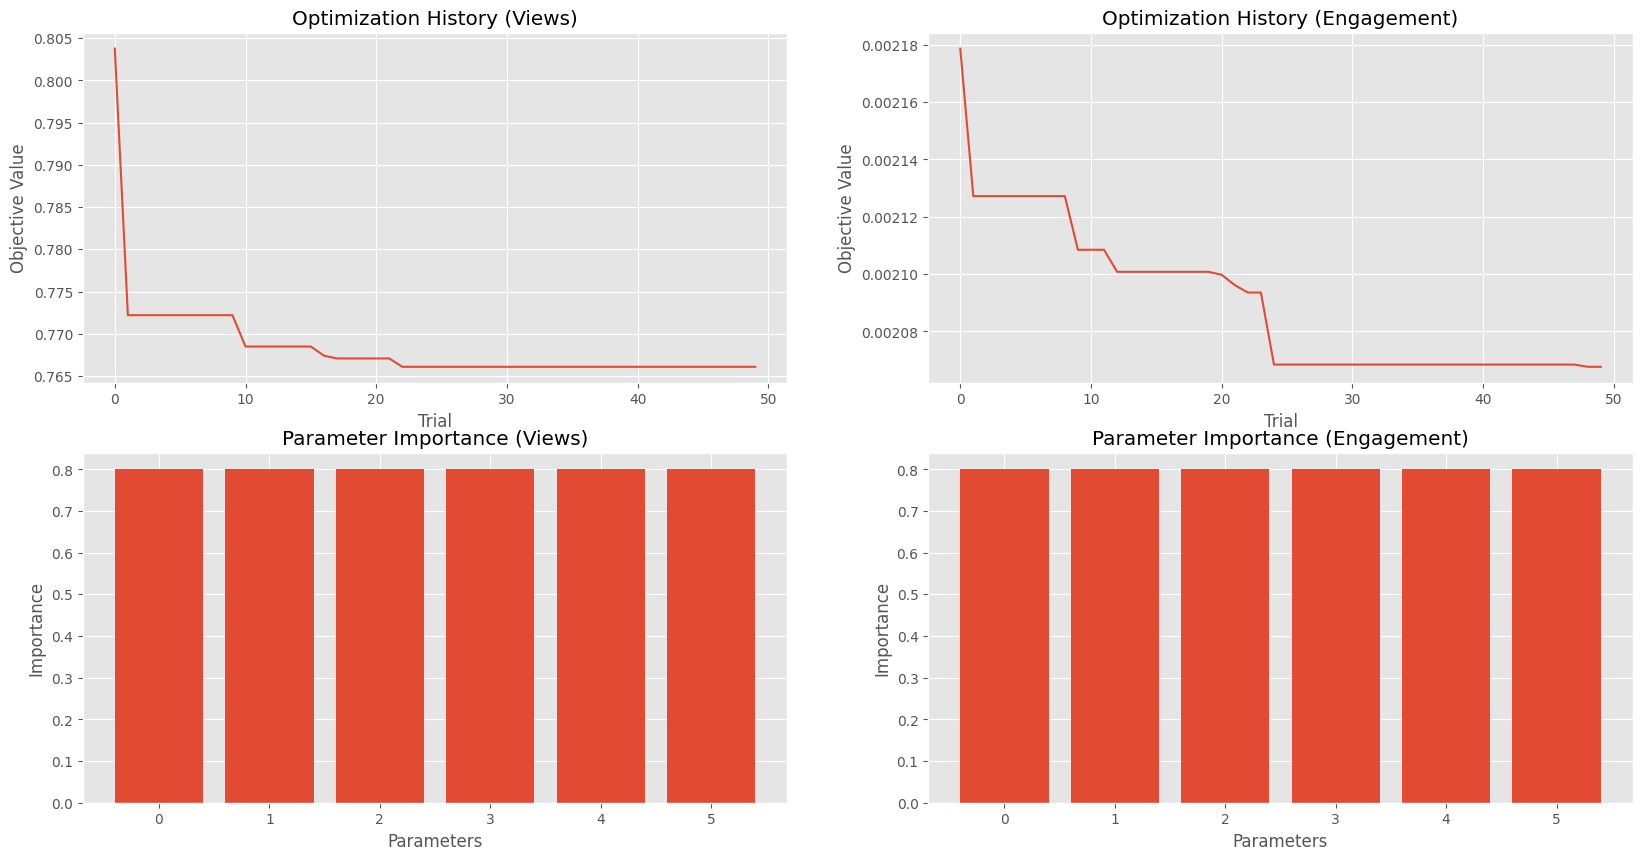

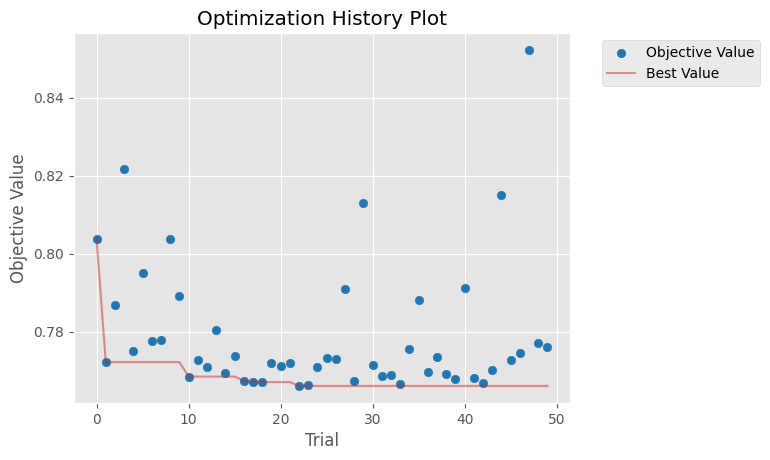

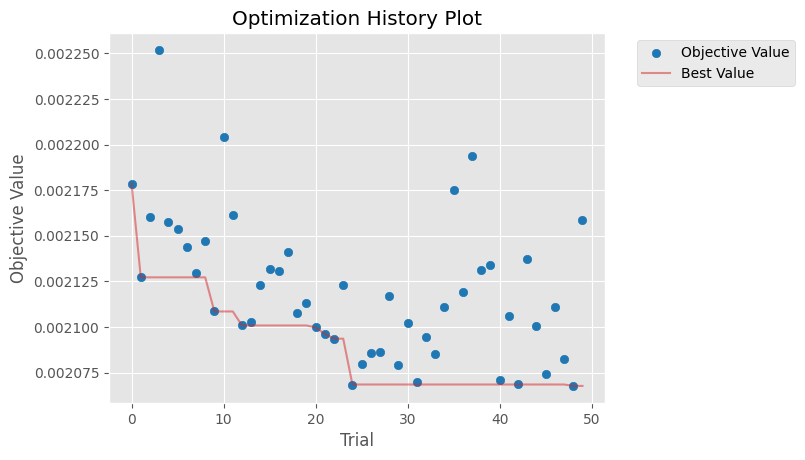

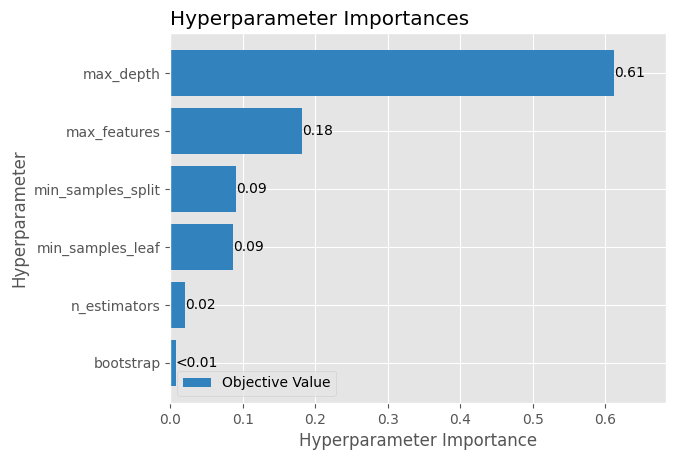

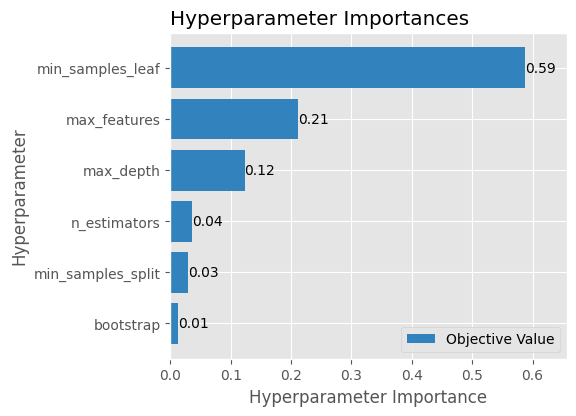

In [ ]:
# Create a new figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

# Get optimization history plots
fig_opt_views = optuna.visualization.matplotlib.plot_optimization_history(study_views)
for line in fig_opt_views.get_lines():
    ax1.plot(line.get_xdata(), line.get_ydata())
ax1.set_title("Optimization History (Views)")
ax1.set_xlabel("Trial")
ax1.set_ylabel("Objective Value")
ax1.grid(True)

fig_opt_eng = optuna.visualization.matplotlib.plot_optimization_history(study_engagement)
for line in fig_opt_eng.get_lines():
    ax2.plot(line.get_xdata(), line.get_ydata())
ax2.set_title("Optimization History (Engagement)")
ax2.set_xlabel("Trial")
ax2.set_ylabel("Objective Value")
ax2.grid(True)

# Get parameter importance plots
fig_param_views = optuna.visualization.matplotlib.plot_param_importances(study_views)
importance_data_views = fig_param_views.containers[0]
x_labels = [patch.get_x() + patch.get_width()/2 for patch in importance_data_views]
heights = [patch.get_height() for patch in importance_data_views]
ax3.bar(range(len(importance_data_views)), heights)
ax3.set_title("Parameter Importance (Views)")
ax3.set_xlabel("Parameters")
ax3.set_ylabel("Importance")
ax3.grid(True)

fig_param_eng = optuna.visualization.matplotlib.plot_param_importances(study_engagement)
importance_data_eng = fig_param_eng.containers[0]
x_labels = [patch.get_x() + patch.get_width()/2 for patch in importance_data_eng]
heights = [patch.get_height() for patch in importance_data_eng]
ax4.bar(range(len(importance_data_eng)), heights)
ax4.set_title("Parameter Importance (Engagement)")
ax4.set_xlabel("Parameters")
ax4.set_ylabel("Importance")
ax4.grid(True)

# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

# Save the figure
fig.savefig('optimization_results.png', dpi=300, bbox_inches='tight')

# Close all figures to free memory
plt.close('all')

**Optimization History Plots (Top):**
1. **Views (Left):**
   - Quick initial improvement (steep drop)
   - Stabilizes around trial 30
   - RMSE decreases from ~0.80 to ~0.77
   - Suggests optimization was effective but reached diminishing returns

2. **Engagement (Right):**
   - Similar pattern of rapid initial improvement
   - Multiple step-wise improvements
   - RMSE decreases from ~0.00218 to ~0.00207
   - Shows steady optimization progress

**Parameter Importance Plots (Bottom):**
- Both models show relatively equal importance across parameters (all bars around 0.8)
- This suggests that:
  1. All chosen parameters contribute meaningfully to model performance
  2. No single parameter dominates the optimization
  3. The full parameter space was worth exploring

**Key Takeaway:** The optimization process was effective and reached convergence for both models, with all parameters playing important roles in the final performance.

### 3.3.1 Save Tuned Models

In [ ]:
import pickle
import joblib
from datetime import datetime
import os

# Specify the base directory
base_dir = r"C:\Users\Essi_ASUS_STRIX\Desktop\Unit-3\Coding\Saved_Models_Data"

# Create subdirectories
data_dir = os.path.join(base_dir, 'data', 'processed')
models_dir = os.path.join(base_dir, 'models')

# Create directories if they don't exist
os.makedirs(data_dir, exist_ok=True)
os.makedirs(models_dir, exist_ok=True)

# Create timestamp
timestamp = datetime.now().strftime('%Y%m%d_%H%M')

# Save the optimized Random Forest models
joblib.dump(best_RF_views, os.path.join(models_dir, f'RF_views_{timestamp}.joblib'))
joblib.dump(best_RF_eng, os.path.join(models_dir, f'RF_engagement_{timestamp}.joblib'))

# Save model parameters and performance metrics
model_info = {
    'views_model': {
        'parameters': study_views.best_params,
        'r2_score': r2_score(y_views_val, views_pred),
        'rmse': np.sqrt(mean_squared_error(y_views_val, views_pred))
    },
    'engagement_model': {
        'parameters': study_engagement.best_params,
        'r2_score': r2_score(y_eng_val, engagement_pred),
        'rmse': np.sqrt(mean_squared_error(y_eng_val, engagement_pred))
    },
    'timestamp': timestamp
}

# Save model information
with open(os.path.join(models_dir, f'model_info_{timestamp}.pkl'), 'wb') as f:
    pickle.dump(model_info, f)

print("Models and information saved in:")
print(f"Models directory: {models_dir}")
print("\nSaved files:")
print(f"- Views model: RF_views_{timestamp}.joblib")
print(f"- Engagement model: RF_engagement_{timestamp}.joblib")
print(f"- Model information: model_info_{timestamp}.pkl")

# Print model information
print("\nModel Information:")
print("\nViews Model:")
print("Parameters:", model_info['views_model']['parameters'])
print(f"R2 Score: {model_info['views_model']['r2_score']:.4f}")
print(f"RMSE: {model_info['views_model']['rmse']:.4f}")

print("\nEngagement Model:")
print("Parameters:", model_info['engagement_model']['parameters'])
print(f"R2 Score: {model_info['engagement_model']['r2_score']:.4f}")
print(f"RMSE: {model_info['engagement_model']['rmse']:.4f}")

Models and information saved in:
Models directory: C:\Users\Essi_ASUS_STRIX\Desktop\Unit-3\Coding\Saved_Models_Data\models

Saved files:
- Views model: RF_views_20241106_1902.joblib
- Engagement model: RF_engagement_20241106_1902.joblib
- Model information: model_info_20241106_1902.pkl

Model Information:

Views Model:
Parameters: {'bootstrap': True, 'n_estimators': 236, 'max_depth': 25, 'min_samples_split': 12, 'min_samples_leaf': 2, 'max_features': 0.5518019271112343, 'max_samples': 0.9921903659466058}
R2 Score: 0.4539
RMSE: 0.7661

Engagement Model:
Parameters: {'bootstrap': True, 'n_estimators': 101, 'max_depth': 21, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.17550582499567208, 'max_samples': 0.5211638543924302}
R2 Score: 0.6344
RMSE: 0.0021


In [ ]:
import os

# Specify the base directory
base_dir = r"C:\Users\Essi_ASUS_STRIX\Desktop\Unit-3\Coding\Saved_Models_Data"
data_dir = os.path.join(base_dir, 'data', 'processed')
models_dir = os.path.join(base_dir, 'models')

print("Files in data directory:")
for file in os.listdir(data_dir):
    print(f"- {file}")

print("\nFiles in models directory:")
for file in os.listdir(models_dir):
    print(f"- {file}")

Files in data directory:
- feature_names_20241106_1736.pkl
- X_test_20241106_1736.joblib
- X_train_20241106_1736.joblib
- X_val_20241106_1736.joblib
- y_eng_test_20241106_1736.joblib
- y_eng_train_20241106_1736.joblib
- y_eng_val_20241106_1736.joblib
- y_views_test_20241106_1736.joblib
- y_views_train_20241106_1736.joblib
- y_views_val_20241106_1736.joblib

Files in models directory:
- model_info_20241106_1902.pkl
- RF_engagement_20241106_1902.joblib
- RF_views_20241106_1902.joblib
- scaler_20241106_1736.joblib


## 3.4 SHAP (model-guided)

Models and data loaded successfully


<Figure size 640x480 with 0 Axes>

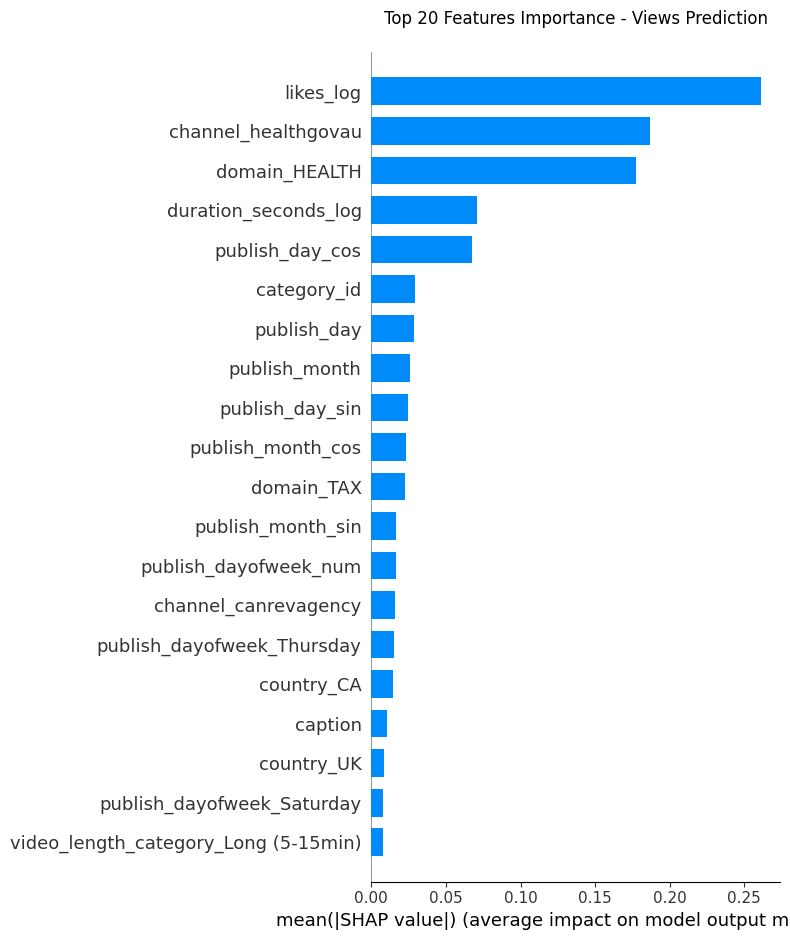

<Figure size 640x480 with 0 Axes>

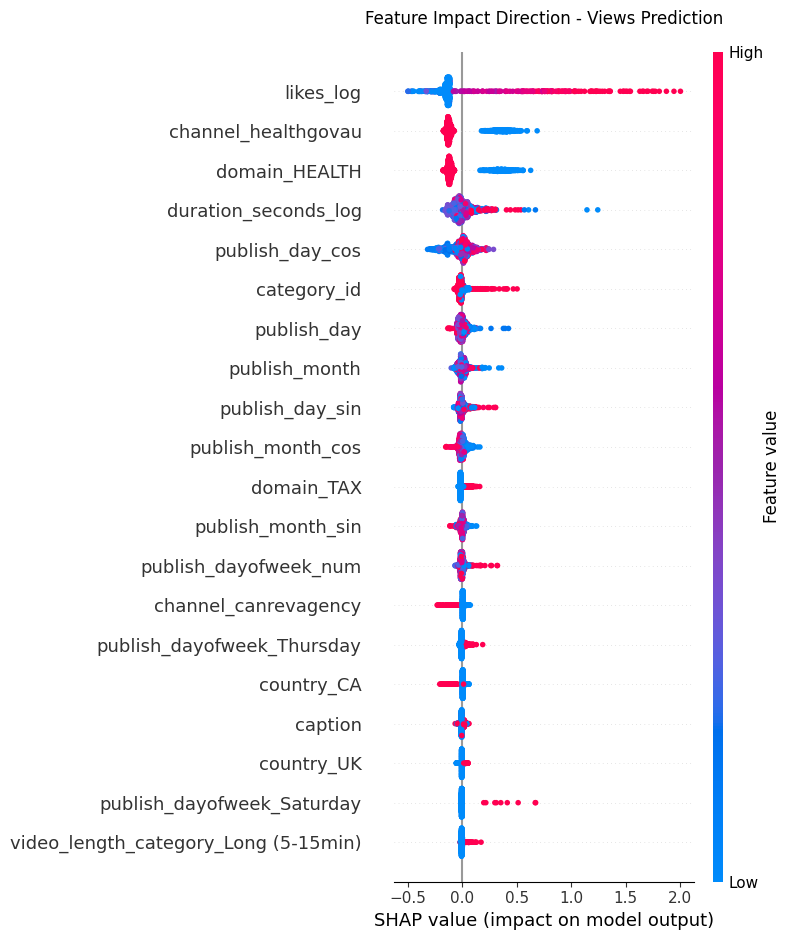

<Figure size 640x480 with 0 Axes>

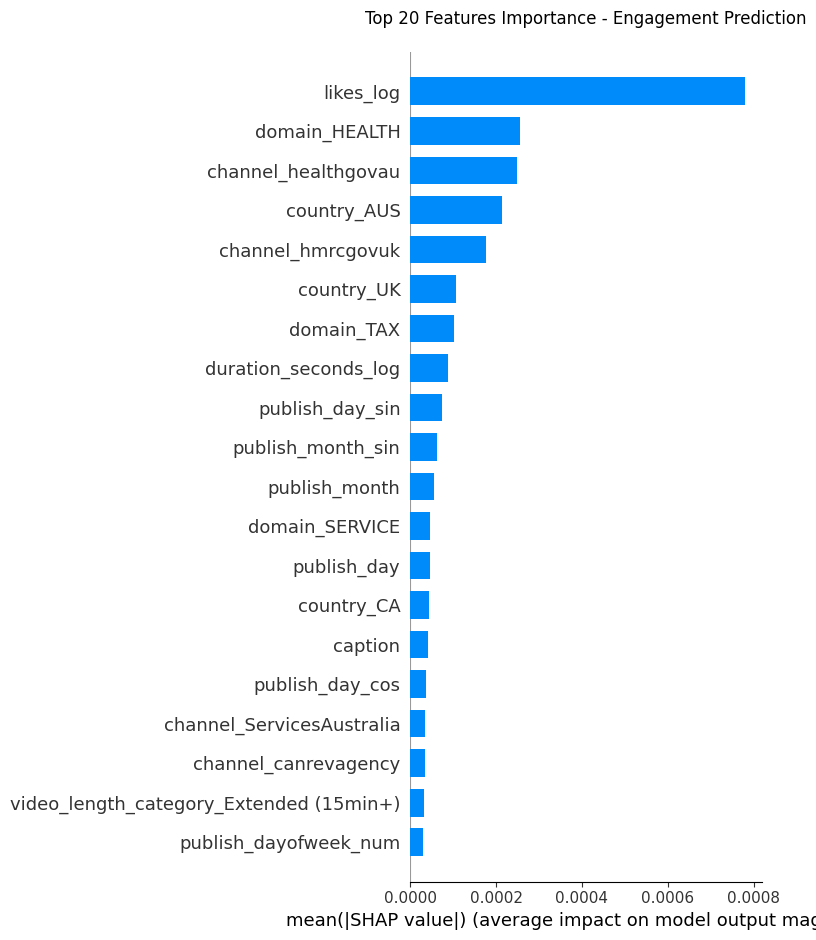

<Figure size 640x480 with 0 Axes>

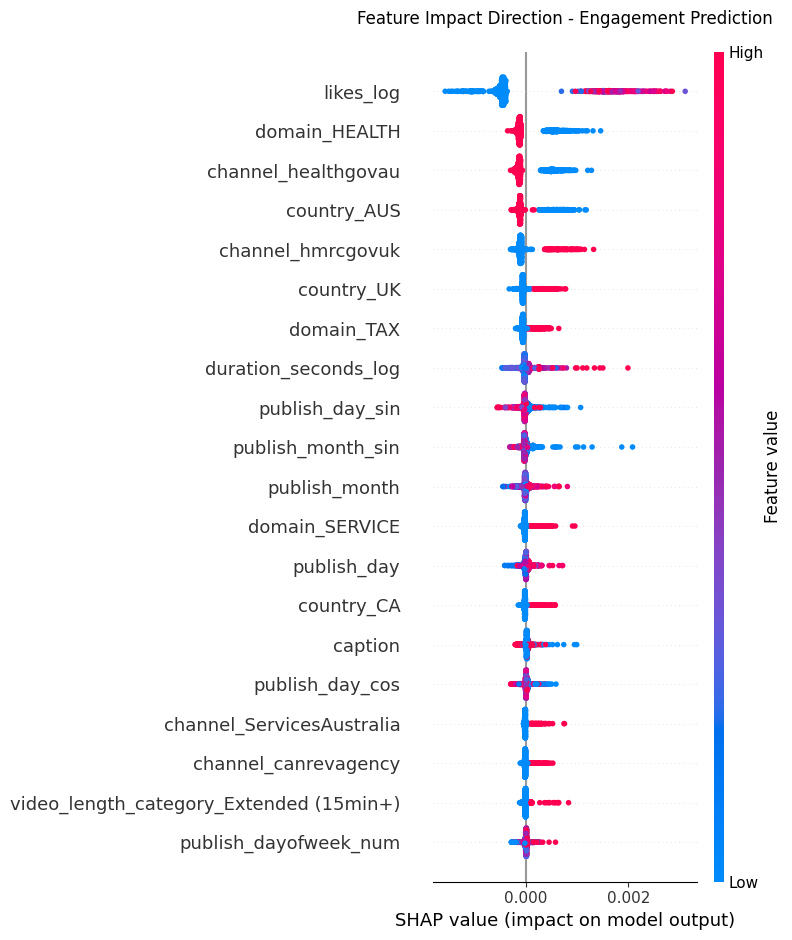


Top 20 Features for Views Prediction:
                                 Feature  Importance
35                             likes_log    0.260914
30                   channel_healthgovau    0.186976
19                         domain_HEALTH    0.177537
37                  duration_seconds_log    0.071066
41                       publish_day_cos    0.067483
0                            category_id    0.028932
4                            publish_day    0.028887
3                          publish_month    0.025792
40                       publish_day_sin    0.024580
39                     publish_month_cos    0.023099
21                            domain_TAX    0.022709
38                     publish_month_sin    0.016768
5                  publish_dayofweek_num    0.016351
29                  channel_canrevagency    0.015886
16            publish_dayofweek_Thursday    0.015137
23                            country_CA    0.014745
1                                caption    0.010281
25     

In [ ]:
import os
import joblib
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Specify the base directory and paths
base_dir = r"C:\Users\Essi_ASUS_STRIX\Desktop\Unit-3\Coding\Saved_Models_Data"
data_dir = os.path.join(base_dir, 'data', 'processed')
models_dir = os.path.join(base_dir, 'models')

# Define timestamps based on actual files
model_timestamp = "20241106_1902"  # For RF models
data_timestamp = "20241106_1736"   # For X_train and other data files
scaler_timestamp = "20241106_1736" # For scaler

# 1. Load models and data
try:
    # Load Random Forest models (1902 timestamp)
    best_RF_views = joblib.load(os.path.join(models_dir, f'RF_views_{model_timestamp}.joblib'))
    best_RF_eng = joblib.load(os.path.join(models_dir, f'RF_engagement_{model_timestamp}.joblib'))

    # Load training data (1736 timestamp)
    X_train = joblib.load(os.path.join(data_dir, f'X_train_{data_timestamp}.joblib'))

    # Load scaler if needed (1736 timestamp)
    scaler = joblib.load(os.path.join(models_dir, f'scaler_{scaler_timestamp}.joblib'))

    print("Models and data loaded successfully")
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("\nAvailable files in models directory:")
    print(os.listdir(models_dir))
    print("\nAvailable files in data directory:")
    print(os.listdir(data_dir))
    raise

# Calculate SHAP values
sample_size = min(1000, len(X_train))  # Use 1000 samples or all if less
X_sample = X_train.sample(n=sample_size, random_state=42)

# Initialize explainers
explainer_views = shap.TreeExplainer(best_RF_views)
explainer_eng = shap.TreeExplainer(best_RF_eng)

# Calculate SHAP values
shap_values_views = explainer_views.shap_values(X_sample)
shap_values_eng = explainer_eng.shap_values(X_sample)

# Create SHAP summary plots
plt.clf()  # Clear any existing plots

# Views Model Plots
# 1. Bar Plot
plt.figure(figsize=(15, 10))
shap.summary_plot(
    shap_values_views,
    X_sample,
    plot_type="bar",
    max_display=20,
    show=False
)
plt.title("Top 20 Features Importance - Views Prediction", pad=20)
plt.tight_layout()
plt.show()

plt.clf()  # Clear between plots

# 2. Beeswarm Plot
plt.figure(figsize=(15, 10))
shap.summary_plot(
    shap_values_views,
    X_sample,
    max_display=20,
    show=False
)
plt.title("Feature Impact Direction - Views Prediction", pad=20)
plt.tight_layout()
plt.show()

plt.clf()  # Clear between plots

# Engagement Model Plots
# 1. Bar Plot
plt.figure(figsize=(15, 10))
shap.summary_plot(
    shap_values_eng,
    X_sample,
    plot_type="bar",
    max_display=20,
    show=False
)
plt.title("Top 20 Features Importance - Engagement Prediction", pad=20)
plt.tight_layout()
plt.show()

plt.clf()  # Clear between plots

# 2. Beeswarm Plot
plt.figure(figsize=(15, 10))
shap.summary_plot(
    shap_values_eng,
    X_sample,
    max_display=20,
    show=False
)
plt.title("Feature Impact Direction - Engagement Prediction", pad=20)
plt.tight_layout()
plt.show()

# Print feature importance rankings
def get_feature_importance(shap_values, feature_names):
    importance = np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values('Importance', ascending=False)
    return feature_importance

# Print top 20 features for both models
print("\nTop 20 Features for Views Prediction:")
views_importance = get_feature_importance(shap_values_views, X_sample.columns)
print(views_importance.head(20).to_string())

print("\nTop 20 Features for Engagement Prediction:")
eng_importance = get_feature_importance(shap_values_eng, X_sample.columns)
print(eng_importance.head(20).to_string())

# Clean up
plt.close('all')

# 4. Deep Learning

## 4.1 Load and Check Data

In [ ]:
import joblib
import pickle
import os

# Specify the base directory and timestamp
base_dir = r"C:\Users\Essi_ASUS_STRIX\Desktop\Unit-3\Coding\Saved_Models_Data"
timestamp = "20241106_1736"  # Your saved timestamp

# Define directories
data_dir = os.path.join(base_dir, 'data', 'processed')
models_dir = os.path.join(base_dir, 'models')

# 1. Load feature sets
X_train = joblib.load(os.path.join(data_dir, f'X_train_{timestamp}.joblib'))
X_val = joblib.load(os.path.join(data_dir, f'X_val_{timestamp}.joblib'))
X_test = joblib.load(os.path.join(data_dir, f'X_test_{timestamp}.joblib'))

# 2. Load target variables
# Views per day
y_views_train = joblib.load(os.path.join(data_dir, f'y_views_train_{timestamp}.joblib'))
y_views_val = joblib.load(os.path.join(data_dir, f'y_views_val_{timestamp}.joblib'))
y_views_test = joblib.load(os.path.join(data_dir, f'y_views_test_{timestamp}.joblib'))

# Engagement rate
y_eng_train = joblib.load(os.path.join(data_dir, f'y_eng_train_{timestamp}.joblib'))
y_eng_val = joblib.load(os.path.join(data_dir, f'y_eng_val_{timestamp}.joblib'))
y_eng_test = joblib.load(os.path.join(data_dir, f'y_eng_test_{timestamp}.joblib'))

# 3. Load scaler and feature names
scaler = joblib.load(os.path.join(models_dir, f'scaler_{timestamp}.joblib'))
with open(os.path.join(data_dir, f'feature_names_{timestamp}.pkl'), 'rb') as f:
    feature_names = pickle.load(f)


# =====================================Check Data

# 1. First, let's check what features are available
print("Available Features:")
print(X_train.columns.tolist())

# 2. Let's categorize the features
def analyze_features(X):
    # Get data types
    dtypes = X.dtypes

    # Initialize feature categories
    text_features = []
    numerical_features = []
    categorical_features = []

    for col in X.columns:
        # Check if column contains text data
        if 'title' in col.lower() or 'description' in col.lower() or 'tags' in col.lower():
            text_features.append(col)
        # Check if numerical
        elif dtypes[col] in ['int64', 'float64']:
            numerical_features.append(col)
        # Everything else is categorical
        else:
            categorical_features.append(col)

    return {
        'text': text_features,
        'numerical': numerical_features,
        'categorical': categorical_features
    }

feature_types = analyze_features(X_train)

# 3. Print feature analysis
print("\nFeature Analysis:")
print(f"Total features: {len(X_train.columns)}")
print(f"\nText features ({len(feature_types['text'])}):")
print(feature_types['text'])
print(f"\nNumerical features ({len(feature_types['numerical'])}):")
print(feature_types['numerical'])
print(f"\nCategorical features ({len(feature_types['categorical'])}):")
print(feature_types['categorical'])

# 4. Check for missing values
print("\nMissing Values:")
print(X_train.isnull().sum().sum())

# 5. Check data shapes
print("\nData Shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"X_test: {X_test.shape}")

# 6. Sample data preview
print("\nSample Data Preview:")
print(X_train.head(2))

# 7. Memory usage
print("\nMemory Usage:")
print(f"X_train memory: {X_train.memory_usage().sum() / 1024**2:.2f} MB")

# 8. Check if we have the necessary features for multimodal
def check_multimodal_readiness(feature_types):
    requirements = {
        'text': len(feature_types['text']) > 0,
        'numerical': len(feature_types['numerical']) > 0,
        'categorical': len(feature_types['categorical']) > 0
    }

    print("\nMultimodal Requirements Check:")
    for req_type, has_features in requirements.items():
        status = "✓" if has_features else "✗"
        print(f"{req_type.capitalize()} features: {status}")

    return all(requirements.values())

is_ready = check_multimodal_readiness(feature_types)
print(f"\nData ready for multimodal approach: {'Yes' if is_ready else 'No'}")

# 9. If text features exist, show text statistics
if feature_types['text']:
    print("\nText Feature Statistics:")
    for text_col in feature_types['text']:
        text_lengths = X_train[text_col].str.len()
        print(f"\n{text_col}:")
        print(f"Average length: {text_lengths.mean():.1f}")
        print(f"Max length: {text_lengths.max()}")
        print(f"Min length: {text_lengths.min()}")

Available Features:
['category_id', 'caption', 'licensed_content', 'publish_month', 'publish_day', 'publish_dayofweek_num', 'definition_hd', 'definition_sd', 'video_length_category_Extended (15min+)', 'video_length_category_Long (5-15min)', 'video_length_category_Medium (1-5min)', 'video_length_category_Short (0-1min)', 'publish_dayofweek_Friday', 'publish_dayofweek_Monday', 'publish_dayofweek_Saturday', 'publish_dayofweek_Sunday', 'publish_dayofweek_Thursday', 'publish_dayofweek_Tuesday', 'publish_dayofweek_Wednesday', 'domain_HEALTH', 'domain_SERVICE', 'domain_TAX', 'country_AUS', 'country_CA', 'country_NZ', 'country_UK', 'channel_AusTaxOffice', 'channel_InlandRevenueNZ', 'channel_ServicesAustralia', 'channel_canrevagency', 'channel_healthgovau', 'channel_hmrcgovuk', 'projection_rectangular', 'privacy_status_public', 'license_youtube', 'likes_log', 'comments_log', 'duration_seconds_log', 'publish_month_sin', 'publish_month_cos', 'publish_day_sin', 'publish_day_cos']

Feature Analysis

## 4.2 Artificial Neural Network (ANN)

**Multi-task Model**:  
The `YouTubeMultiTaskNet` is an artificial neural network (ANN) designed to predict two targets—views and engagement—simultaneously. This multi-task approach leverages shared feature representations to learn common patterns useful for both tasks.

**Residual Blocks for Feature Learning**:  
The model uses residual blocks, defined in the `ResidualBlock` class, to allow for deeper networks without encountering the vanishing gradient problem. Each residual block:
- Contains two fully connected (dense) layers with ReLU activation, batch normalization, and dropout for regularization.
- Utilizes a residual connection that adds the input to the block’s output, enhancing stability and reusability of learned features.

**Shared and Task-specific Layers**:
- **Shared Input Layer**: The model begins with an input projection layer that maps input features to a higher-dimensional space, forming a strong foundation for the network.
- **Shared Residual Layers**: Three residual blocks follow the input layer, enabling feature refinement that benefits both prediction tasks.
- **Task-specific Towers**: After shared layers, two separate "towers" (fully connected layers) are dedicated to each target. These task-specific towers allow the model to optimize separately for views and engagement. Each tower consists of:
  - Dense layers with ReLU activation, batch normalization, and dropout to refine and regularize predictions.

### Loss Function and Optimization

**Dynamic Loss Weighting**:  
The `combined_loss` function computes a dynamically weighted loss, adjusting weights based on the exponential of each task’s error. This allows the model to focus more on the task with higher error, balancing learning across both targets.

**Training and Validation Loops**:
- **Train and Validate Epochs**: In each epoch, the model computes the loss and R² score (coefficient of determination) for both views and engagement on the training and validation sets.
- **Optimizer**: The model uses the AdamW optimizer with weight decay for better generalization, and a cosine annealing learning rate scheduler that gradually reduces the learning rate.
- **Early Stopping**: Training halts if the validation loss fails to improve over a specified number of epochs, preventing overfitting.

### Performance Metrics and Monitoring

**Metrics Tracking**:  
The model tracks mean squared error (MSE) and R² scores for both views and engagement, logging metrics for each epoch. This data helps monitor the model’s progress and is stored in a history dictionary for visualization.

### Summary

This multi-task ANN model leverages residual blocks, dynamic loss weighting, and task-specific layers to predict views and engagement for YouTube data. The residual connections improve feature learning stability, while the dynamic loss weighting enhances task balancing. Together, these elements make it well-suited for the complex patterns found in multi-task learning scenarios.

Processing features...

Feature stats after scaling:
X mean: 3.0513093341601324e-18
X std: 0.9050140329275238
Views range: [0.0, 0.5881925857370507]
Engagement range: [0.0, 1.0]
Processing features...

Feature stats after scaling:
X mean: -9.567388176275299e-18
X std: 0.8816886555321782
Views range: [0.0, 0.5602306183360372]
Engagement range: [0.0, 1.0]
Processing features...

Feature stats after scaling:
X mean: -7.90809945197663e-18
X std: 0.8816886555321782
Views range: [0.0, 0.5692436474714802]
Engagement range: [0.0, 1.0]
Epoch 1/100:
Train Loss: 0.1927 (Views: 0.1913, Eng: 0.1953)
Val Loss: 0.0259 (Views: 0.0284, Eng: 0.0233)
Train R² (Views): -1.0000, Train R² (Engagement): -1.0000
Val R² (Views): -0.2112, Val R² (Engagement): -0.8816
--------------------------------------------------
Epoch 2/100:
Train Loss: 0.0934 (Views: 0.0934, Eng: 0.0939)
Val Loss: 0.0213 (Views: 0.0279, Eng: 0.0148)
Train R² (Views): -0.9773, Train R² (Engagement): -1.0000
Val R² (Views): -0.1867, Val R² 

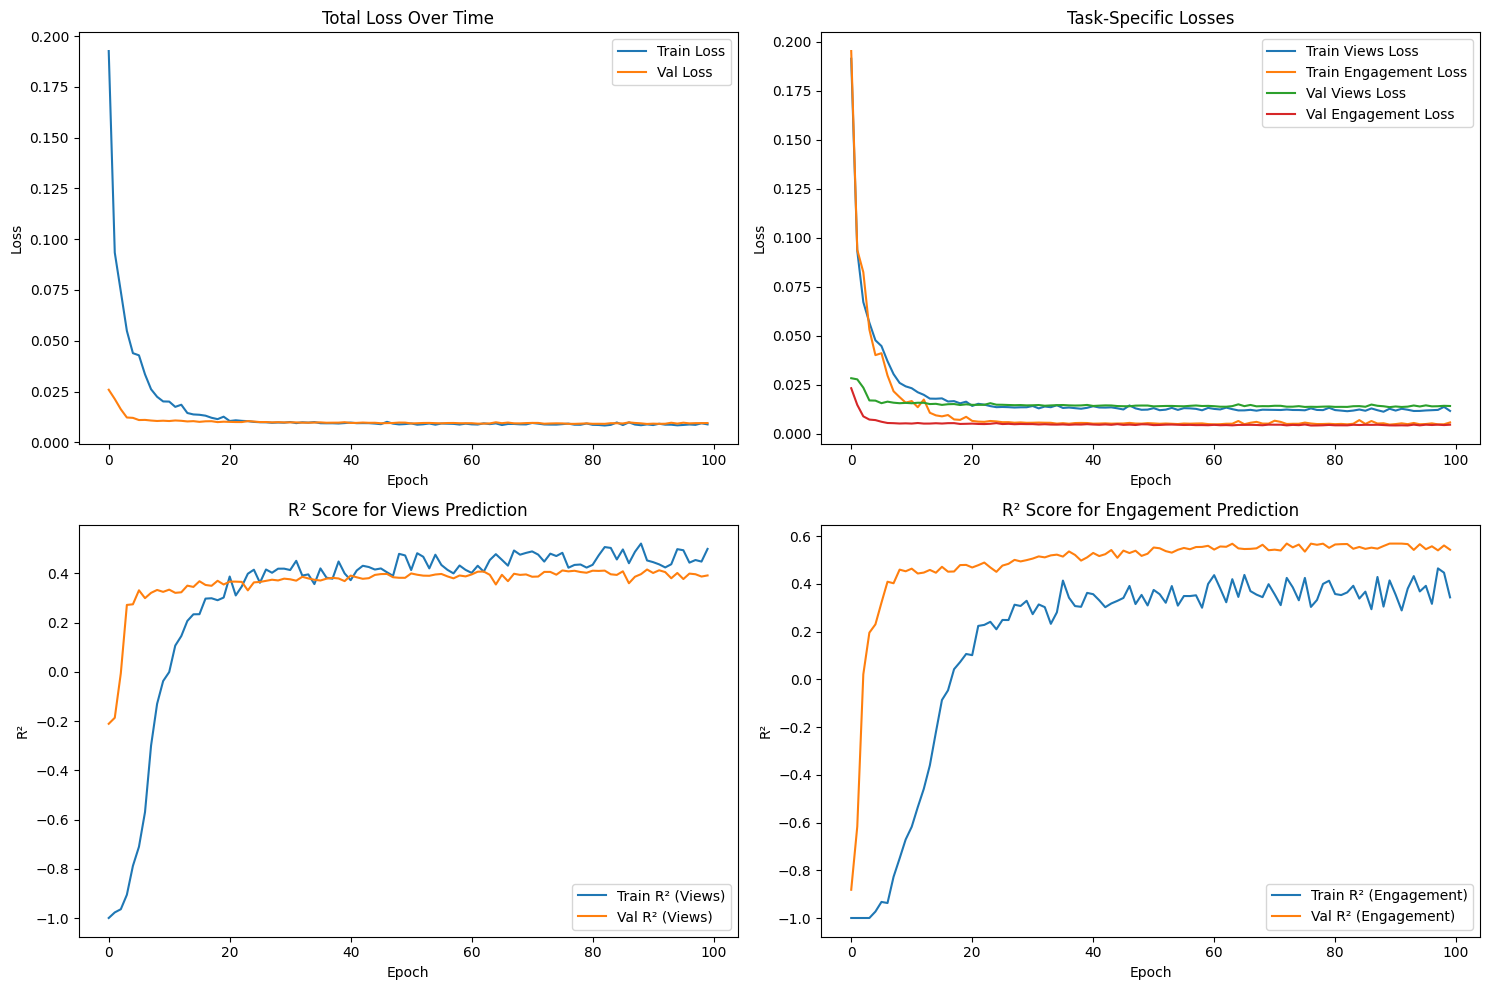

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import CosineAnnealingLR
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# =========================
# Data Preprocessing
# =========================
def prepare_data(X, y_views, y_engagement):
    print("Processing features...")

    scaler = StandardScaler()
    X_processed = scaler.fit_transform(X)
    X_processed = pd.DataFrame(X_processed, columns=X.columns)

    # Log transform for views
    y_views_processed = np.log1p(y_views)

    # Scale engagement to [0,1]
    y_eng_processed = (y_engagement - y_engagement.min()) / (y_engagement.max() - y_engagement.min())

    print("\nFeature stats after scaling:")
    print("X mean:", X_processed.mean().mean())
    print("X std:", X_processed.std().mean())
    print("Views range:", [y_views_processed.min(), y_views_processed.max()])
    print("Engagement range:", [y_eng_processed.min(), y_eng_processed.max()])

    return X_processed, y_views_processed, y_eng_processed

# =========================
# Enhanced Dataset
# =========================
class YouTubeDataset(Dataset):
    def __init__(self, X, y_views, y_engagement, augment=False):
        self.features = torch.FloatTensor(X.values)
        self.views = torch.FloatTensor(y_views.values).reshape(-1, 1)
        self.engagement = torch.FloatTensor(y_engagement.values).reshape(-1, 1)
        self.augment = augment

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        features = self.features[idx]

        if self.augment and torch.rand(1) < 0.5:
            noise = torch.randn_like(features) * 0.05
            features = features + noise

        return {
            'features': features,
            'views': self.views[idx],
            'engagement': self.engagement[idx]
        }

# =========================
# Improved Model Architecture
# =========================
class ResidualBlock(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.block = nn.Sequential(
            nn.Linear(in_features, in_features),
            nn.ReLU(),
            nn.BatchNorm1d(in_features),
            nn.Dropout(0.3),
            nn.Linear(in_features, in_features)
        )

    def forward(self, x):
        return x + self.block(x)

class YouTubeMultiTaskNet(nn.Module):
    def __init__(self, input_dim=42):
        super().__init__()

        self.input_proj = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3)
        )

        self.res_blocks = nn.ModuleList([
            ResidualBlock(128) for _ in range(3)
        ])

        self.views_tower = nn.Sequential(
            nn.Linear(128, 64),
            ResidualBlock(64),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.2),
            nn.Linear(32, 1)
        )

        self.engagement_tower = nn.Sequential(
            nn.Linear(128, 64),
            ResidualBlock(64),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.2),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        x = self.input_proj(x)

        for res_block in self.res_blocks:
            x = res_block(x)

        views = self.views_tower(x)
        engagement = self.engagement_tower(x)

        return views, engagement

# =========================
# Improved Loss Function
# =========================
def combined_loss(views_pred, views_true, eng_pred, eng_true):
    views_loss = F.mse_loss(views_pred, views_true)
    eng_loss = F.mse_loss(eng_pred, eng_true)

    views_weight = torch.exp(-views_loss).detach()
    eng_weight = torch.exp(-eng_loss).detach()

    return (views_weight * views_loss + eng_weight * eng_loss) / (views_weight + eng_weight)

# =========================
# Training Functions
# =========================
def train_epoch(model, train_loader, optimizer, device):
    model.train()
    total_loss, views_loss, eng_loss = 0, 0, 0
    views_r2, eng_r2 = 0, 0
    n_batches = len(train_loader)

    for batch in train_loader:
        features = batch['features'].to(device)
        views = batch['views'].to(device)
        engagement = batch['engagement'].to(device)

        optimizer.zero_grad()
        views_pred, eng_pred = model(features)

        loss = combined_loss(views_pred, views, eng_pred, engagement)
        v_loss = F.mse_loss(views_pred, views)
        e_loss = F.mse_loss(eng_pred, engagement)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        views_loss += v_loss.item()
        eng_loss += e_loss.item()

        views_r2 += r2_score(views_pred.detach().cpu(), views.cpu())
        eng_r2 += r2_score(eng_pred.detach().cpu(), engagement.cpu())

    return (total_loss / n_batches,
            views_loss / n_batches,
            eng_loss / n_batches,
            views_r2 / n_batches,
            eng_r2 / n_batches)

def validate(model, val_loader, device):
    model.eval()
    total_loss, views_loss, eng_loss = 0, 0, 0
    views_r2, eng_r2 = 0, 0
    n_batches = len(val_loader)

    with torch.no_grad():
        for batch in val_loader:
            features = batch['features'].to(device)
            views = batch['views'].to(device)
            engagement = batch['engagement'].to(device)

            views_pred, eng_pred = model(features)

            loss = combined_loss(views_pred, views, eng_pred, engagement)
            v_loss = F.mse_loss(views_pred, views)
            e_loss = F.mse_loss(eng_pred, engagement)

            total_loss += loss.item()
            views_loss += v_loss.item()
            eng_loss += e_loss.item()

            views_r2 += r2_score(views_pred.cpu(), views.cpu())
            eng_r2 += r2_score(eng_pred.cpu(), engagement.cpu())

    return (total_loss / n_batches,
            views_loss / n_batches,
            eng_loss / n_batches,
            views_r2 / n_batches,
            eng_r2 / n_batches)

def train_model(model, train_loader, val_loader, epochs=100, device='cuda'):
    model = model.to(device)
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=0.001,
        weight_decay=0.05,
        betas=(0.9, 0.999)
    )

    scheduler = CosineAnnealingLR(
        optimizer,
        T_max=epochs,
        eta_min=1e-6
    )

    history = {
        'train_loss': [], 'val_loss': [],
        'train_views_loss': [], 'val_views_loss': [],
        'train_eng_loss': [], 'val_eng_loss': [],
        'train_views_r2': [], 'val_views_r2': [],
        'train_eng_r2': [], 'val_eng_r2': []
    }

    best_val_loss = float('inf')
    best_model = None
    patience = 15  # Increased patience
    no_improve = 0

    for epoch in range(epochs):
        train_metrics = train_epoch(model, train_loader, optimizer, device)
        val_metrics = validate(model, val_loader, device)

        train_loss, train_views_loss, train_eng_loss, train_views_r2, train_eng_r2 = train_metrics
        val_loss, val_views_loss, val_eng_loss, val_views_r2, val_eng_r2 = val_metrics

        scheduler.step()

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = model.state_dict()
            no_improve = 0
        else:
            no_improve += 1

        if no_improve >= patience:
            print(f"Early stopping triggered after epoch {epoch+1}")
            break

        # Update history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_views_loss'].append(train_views_loss)
        history['val_views_loss'].append(val_views_loss)
        history['train_eng_loss'].append(train_eng_loss)
        history['val_eng_loss'].append(val_eng_loss)
        history['train_views_r2'].append(train_views_r2)
        history['val_views_r2'].append(val_views_r2)
        history['train_eng_r2'].append(train_eng_r2)
        history['val_eng_r2'].append(val_eng_r2)

        print(f'Epoch {epoch+1}/{epochs}:')
        print(f'Train Loss: {train_loss:.4f} (Views: {train_views_loss:.4f}, Eng: {train_eng_loss:.4f})')
        print(f'Val Loss: {val_loss:.4f} (Views: {val_views_loss:.4f}, Eng: {val_eng_loss:.4f})')
        print(f'Train R² (Views): {train_views_r2:.4f}, Train R² (Engagement): {train_eng_r2:.4f}')
        print(f'Val R² (Views): {val_views_r2:.4f}, Val R² (Engagement): {val_eng_r2:.4f}')
        print('-' * 50)

    model.load_state_dict(best_model)
    return model, history

# =========================
# Run Training
# =========================
# Prepare data
X_train_processed, y_views_train, y_eng_train = prepare_data(X_train, y_views_train, y_eng_train)
X_val_processed, y_views_val, y_eng_val = prepare_data(X_val, y_views_val, y_eng_val)
X_test_processed, y_views_test, y_eng_test = prepare_data(X_test, y_views_test, y_eng_test)

# Create datasets with augmentation for training
train_dataset = YouTubeDataset(X_train_processed, y_views_train, y_eng_train, augment=True)
val_dataset = YouTubeDataset(X_val_processed, y_views_val, y_eng_val, augment=False)
test_dataset = YouTubeDataset(X_test_processed, y_views_test, y_eng_test, augment=False)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

# Initialize and train model
model = YouTubeMultiTaskNet(input_dim=X_train.shape[1])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
trained_model, history = train_model(model, train_loader, val_loader, epochs=100, device=device)

# Plot results
plot_training_history(history)

## 4.3 Transformers

1. **Transformer-based Multi-task Model**:
   - The model, `YouTubeTransformer`, uses a transformer architecture to perform **multi-task predictions** on YouTube data, specifically predicting **views** and **engagement**.
   - This approach leverages transformers’ **self-attention** mechanism to capture complex relationships among input features.

2. **Input Processing**:
   - The input data is preprocessed through `StandardScaler` for standardization. Views data undergoes **log transformation** for normalization, while engagement data is scaled to the range **[0, 1]**.
   - A data augmentation option is implemented to add random noise, improving model robustness.

3. **Transformer Layers**:
   - After initial **input projection** (linear transformation to a fixed embedding size), input data passes through **transformer encoder layers**.
   - These layers utilize **multi-head attention** and **feedforward networks** to learn intricate dependencies in the data.
   - The transformer layers also include **batch normalization** and **dropout** to regularize and stabilize training.

4. **Task-specific Output Heads**:
   - After processing through the shared transformer layers, two separate **fully connected (dense) heads** make final predictions:
     - **Views Prediction Head**
     - **Engagement Prediction Head**
   - This design allows the model to share learning across tasks while maintaining task-specific adaptations.

### Loss Function and Optimization
1. **Combined Loss Function**:
   - The `combined_loss` function calculates a **weighted loss** for views and engagement predictions.
   - It adjusts the loss weights dynamically based on the **exponential of the losses**, which emphasizes learning on the more challenging task.

2. **Training and Validation Loops**:
   - **Train and Validate Epochs**: Each epoch, the model trains and validates over the data, calculating loss and R² (coefficient of determination) for each task.
   - **Optimizer**: `AdamW` is used with weight decay for regularization, and **cosine annealing** adjusts the learning rate over epochs for smoother convergence.
   - **Early Stopping**: Training includes early stopping with patience to prevent overfitting if validation performance stalls.

3. **Evaluation and Metrics**:
   - The model tracks and reports **mean squared error (MSE)** and **R² scores** for both views and engagement during training.
   - Performance is stored in `history` for visualization, enabling monitoring of the model's progress across tasks.

### Summary
This code implements a **multi-task transformer model** that leverages attention mechanisms to capture relationships in YouTube data for dual prediction tasks (views and engagement). The model benefits from **dynamic loss weighting**, **data augmentation**, and **early stopping**, making it robust and suitable for complex, multi-dimensional data.

Processing features...

Feature stats after scaling:
X mean: 3.0513093341601324e-18
X std: 0.9050140329275238
Views range: [0.0, 0.46259663112470106]
Engagement range: [0.0, 1.0]
Processing features...

Feature stats after scaling:
X mean: -9.567388176275299e-18
X std: 0.8816886555321782
Views range: [0.0, 0.44483364260202346]
Engagement range: [0.0, 1.0]
Processing features...

Feature stats after scaling:
X mean: -7.90809945197663e-18
X std: 0.8816886555321782
Views range: [0.0, 0.45059375007698066]
Engagement range: [0.0, 1.0]
Epoch 1/100:
Train Loss: 0.0238 (Views: 0.0297, Eng: 0.0182)
Val Loss: 0.0100 (Views: 0.0137, Eng: 0.0064)
Train R² (Views): -0.4994, Train R² (Engagement): -0.6757
Val R² (Views): 0.0969, Val R² (Engagement): 0.2769
--------------------------------------------------
Epoch 2/100:
Train Loss: 0.0098 (Views: 0.0121, Eng: 0.0075)
Val Loss: 0.0074 (Views: 0.0100, Eng: 0.0049)
Train R² (Views): 0.1823, Train R² (Engagement): -0.0027
Val R² (Views): 0.3375, Val R² (

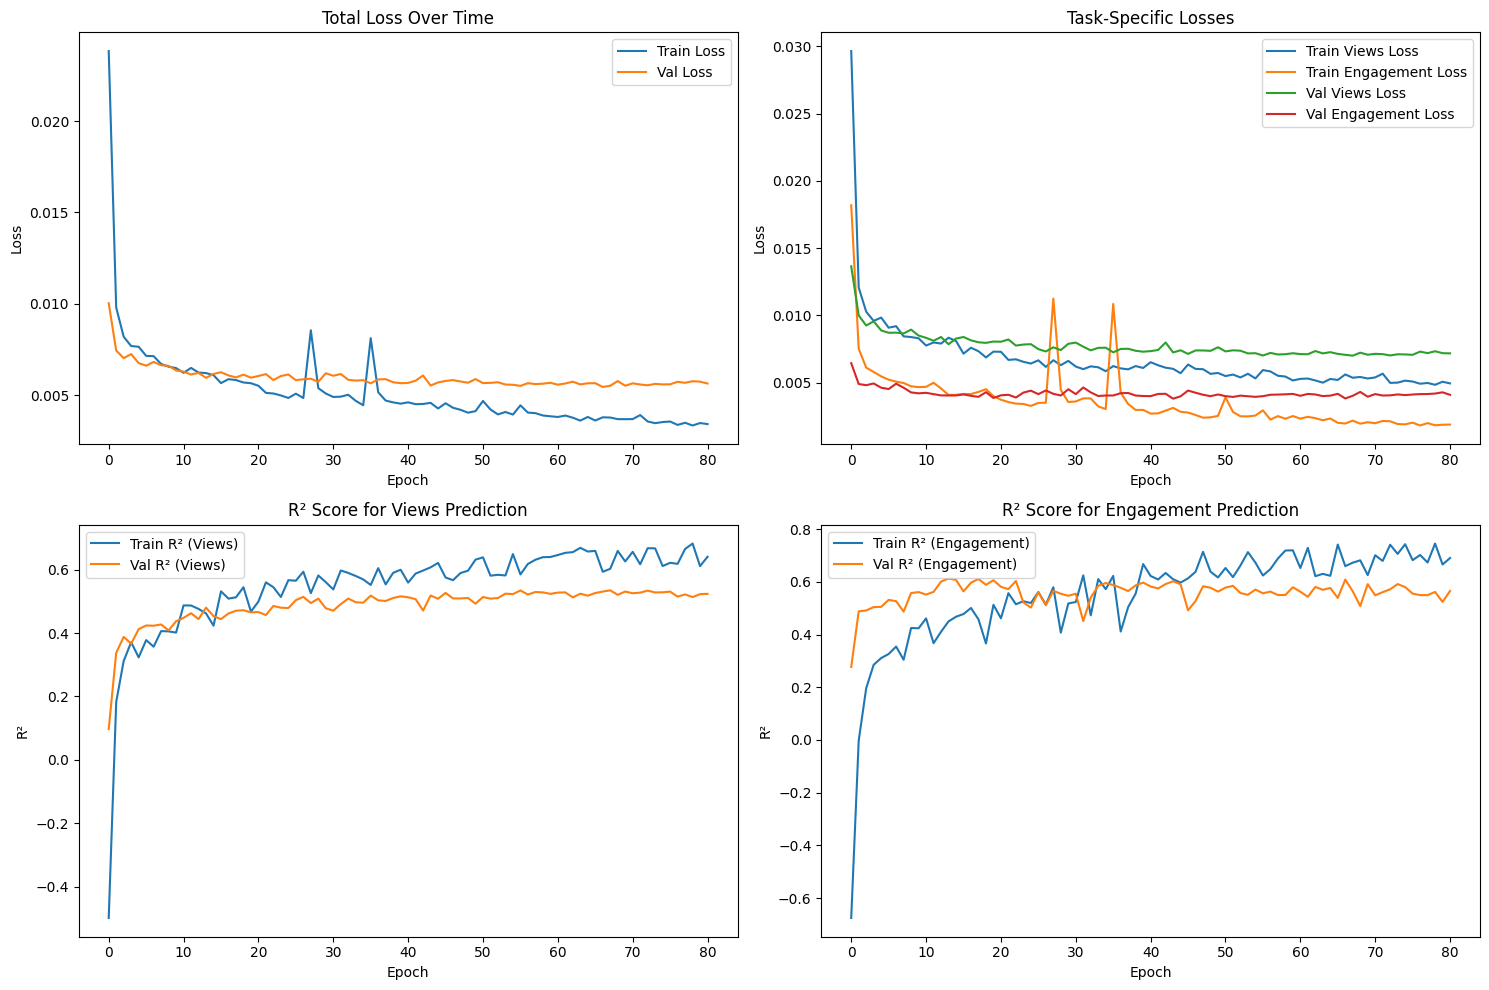

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import CosineAnnealingLR
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# =========================
# Data Preprocessing
# =========================
def prepare_data(X, y_views, y_engagement):
    print("Processing features...")

    scaler = StandardScaler()
    X_processed = scaler.fit_transform(X)
    X_processed = pd.DataFrame(X_processed, columns=X.columns)

    # Log transform for views
    y_views_processed = np.log1p(y_views)

    # Scale engagement to [0,1]
    y_eng_processed = (y_engagement - y_engagement.min()) / (y_engagement.max() - y_engagement.min())

    print("\nFeature stats after scaling:")
    print("X mean:", X_processed.mean().mean())
    print("X std:", X_processed.std().mean())
    print("Views range:", [y_views_processed.min(), y_views_processed.max()])
    print("Engagement range:", [y_eng_processed.min(), y_eng_processed.max()])

    return X_processed, y_views_processed, y_eng_processed

# =========================
# Enhanced Dataset
# =========================
class YouTubeDataset(Dataset):
    def __init__(self, X, y_views, y_engagement, augment=False):
        self.features = torch.FloatTensor(X.values)
        self.views = torch.FloatTensor(y_views.values).reshape(-1, 1)
        self.engagement = torch.FloatTensor(y_engagement.values).reshape(-1, 1)
        self.augment = augment

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        features = self.features[idx]

        if self.augment and torch.rand(1) < 0.5:
            noise = torch.randn_like(features) * 0.05
            features = features + noise

        return {
            'features': features,
            'views': self.views[idx],
            'engagement': self.engagement[idx]
        }

# =========================
# Transformer-based Architecture
# =========================
class YouTubeTransformer(nn.Module):
    def __init__(self, input_dim=42, nhead=4, num_layers=2):
        super().__init__()

        # Hyperparameters
        self.embedding_dim = 64
        self.nhead = nhead
        self.num_layers = num_layers

        # Input projection
        self.input_proj = nn.Sequential(
            nn.Linear(input_dim, self.embedding_dim),
            nn.ReLU(),
            nn.BatchNorm1d(self.embedding_dim),
            nn.Dropout(0.1)
        )

        # Transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=self.embedding_dim,
            nhead=nhead,
            dim_feedforward=128,
            dropout=0.1,
            batch_first=True  # Important for batch processing
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # Task-specific heads with residual connections
        self.views_head = nn.Sequential(
            nn.Linear(self.embedding_dim, 32),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(32, 1)
        )

        self.engagement_head = nn.Sequential(
            nn.Linear(self.embedding_dim, 32),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        # Initial projection
        x = self.input_proj(x)

        # Add positional encoding (optional, since our features don't have sequential order)
        x = x.unsqueeze(1)  # Add sequence dimension [batch, 1, embedding]

        # Transformer processing
        transformer_out = self.transformer(x)

        # Extract features
        features = transformer_out.squeeze(1)  # Remove sequence dimension

        # Task-specific predictions with residual connections
        views = self.views_head(features)
        engagement = self.engagement_head(features)

        return views, engagement
# =========================
# Improved Loss Function
# =========================
def combined_loss(views_pred, views_true, eng_pred, eng_true):
    views_loss = F.mse_loss(views_pred, views_true)
    eng_loss = F.mse_loss(eng_pred, eng_true)

    views_weight = torch.exp(-views_loss).detach()
    eng_weight = torch.exp(-eng_loss).detach()

    return (views_weight * views_loss + eng_weight * eng_loss) / (views_weight + eng_weight)

# =========================
# Training Functions
# =========================
def train_epoch(model, train_loader, optimizer, device):
    model.train()
    total_loss, views_loss, eng_loss = 0, 0, 0
    views_r2, eng_r2 = 0, 0
    n_batches = len(train_loader)

    for batch in train_loader:
        features = batch['features'].to(device)
        views = batch['views'].to(device)
        engagement = batch['engagement'].to(device)

        optimizer.zero_grad()
        views_pred, eng_pred = model(features)

        loss = combined_loss(views_pred, views, eng_pred, engagement)
        v_loss = F.mse_loss(views_pred, views)
        e_loss = F.mse_loss(eng_pred, engagement)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        views_loss += v_loss.item()
        eng_loss += e_loss.item()

        views_r2 += r2_score(views_pred.detach().cpu(), views.cpu())
        eng_r2 += r2_score(eng_pred.detach().cpu(), engagement.cpu())

    return (total_loss / n_batches,
            views_loss / n_batches,
            eng_loss / n_batches,
            views_r2 / n_batches,
            eng_r2 / n_batches)

def validate(model, val_loader, device):
    model.eval()
    total_loss, views_loss, eng_loss = 0, 0, 0
    views_r2, eng_r2 = 0, 0
    n_batches = len(val_loader)

    with torch.no_grad():
        for batch in val_loader:
            features = batch['features'].to(device)
            views = batch['views'].to(device)
            engagement = batch['engagement'].to(device)

            views_pred, eng_pred = model(features)

            loss = combined_loss(views_pred, views, eng_pred, engagement)
            v_loss = F.mse_loss(views_pred, views)
            e_loss = F.mse_loss(eng_pred, engagement)

            total_loss += loss.item()
            views_loss += v_loss.item()
            eng_loss += e_loss.item()

            views_r2 += r2_score(views_pred.cpu(), views.cpu())
            eng_r2 += r2_score(eng_pred.cpu(), engagement.cpu())

    return (total_loss / n_batches,
            views_loss / n_batches,
            eng_loss / n_batches,
            views_r2 / n_batches,
            eng_r2 / n_batches)

def train_model(model, train_loader, val_loader, epochs=100, device='cuda'):
    model = model.to(device)
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=0.001,
        weight_decay=0.05,
        betas=(0.9, 0.999)
    )

    scheduler = CosineAnnealingLR(
        optimizer,
        T_max=epochs,
        eta_min=1e-6
    )

    history = {
        'train_loss': [], 'val_loss': [],
        'train_views_loss': [], 'val_views_loss': [],
        'train_eng_loss': [], 'val_eng_loss': [],
        'train_views_r2': [], 'val_views_r2': [],
        'train_eng_r2': [], 'val_eng_r2': []
    }

    best_val_loss = float('inf')
    best_model = None
    patience = 15  # Increased patience
    no_improve = 0

    for epoch in range(epochs):
        train_metrics = train_epoch(model, train_loader, optimizer, device)
        val_metrics = validate(model, val_loader, device)

        train_loss, train_views_loss, train_eng_loss, train_views_r2, train_eng_r2 = train_metrics
        val_loss, val_views_loss, val_eng_loss, val_views_r2, val_eng_r2 = val_metrics

        scheduler.step()

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = model.state_dict()
            no_improve = 0
        else:
            no_improve += 1

        if no_improve >= patience:
            print(f"Early stopping triggered after epoch {epoch+1}")
            break

        # Update history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_views_loss'].append(train_views_loss)
        history['val_views_loss'].append(val_views_loss)
        history['train_eng_loss'].append(train_eng_loss)
        history['val_eng_loss'].append(val_eng_loss)
        history['train_views_r2'].append(train_views_r2)
        history['val_views_r2'].append(val_views_r2)
        history['train_eng_r2'].append(train_eng_r2)
        history['val_eng_r2'].append(val_eng_r2)

        print(f'Epoch {epoch+1}/{epochs}:')
        print(f'Train Loss: {train_loss:.4f} (Views: {train_views_loss:.4f}, Eng: {train_eng_loss:.4f})')
        print(f'Val Loss: {val_loss:.4f} (Views: {val_views_loss:.4f}, Eng: {val_eng_loss:.4f})')
        print(f'Train R² (Views): {train_views_r2:.4f}, Train R² (Engagement): {train_eng_r2:.4f}')
        print(f'Val R² (Views): {val_views_r2:.4f}, Val R² (Engagement): {val_eng_r2:.4f}')
        print('-' * 50)

    model.load_state_dict(best_model)
    return model, history

# =========================
# Run Training
# =========================
# Prepare data
X_train_processed, y_views_train, y_eng_train = prepare_data(X_train, y_views_train, y_eng_train)
X_val_processed, y_views_val, y_eng_val = prepare_data(X_val, y_views_val, y_eng_val)
X_test_processed, y_views_test, y_eng_test = prepare_data(X_test, y_views_test, y_eng_test)

# Create datasets with augmentation for training
train_dataset = YouTubeDataset(X_train_processed, y_views_train, y_eng_train, augment=True)
val_dataset = YouTubeDataset(X_val_processed, y_views_val, y_eng_val, augment=False)
test_dataset = YouTubeDataset(X_test_processed, y_views_test, y_eng_test, augment=False)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

# Initialize and train model
model = YouTubeTransformer(
    input_dim=X_train.shape[1],
    nhead=4,  # Number of attention heads
    num_layers=2  # Number of transformer layers
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
trained_model, history = train_model(model, train_loader, val_loader, epochs=100, device=device)

# Plot results
plot_training_history(history)

### 4.3.1 Save Trained Transformer

In [ ]:
import os
from datetime import datetime
import pickle

# Specify the base directory
base_dir = r"C:\Users\Essi_ASUS_STRIX\Desktop\Unit-3\Coding\Saved_Models_Data"
models_dir = os.path.join(base_dir, 'models')
os.makedirs(models_dir, exist_ok=True)

# Create timestamp
timestamp = datetime.now().strftime('%Y%m%d_%H%M')

# Save the transformer model
model_path = os.path.join(models_dir, f'transformer_{timestamp}.pth')
model_info = {
    'model_state': trained_model.state_dict(),
    'model_config': {
        'input_dim': X_train.shape[1],
        'nhead': 4,
        'num_layers': 2
    },
    'feature_names': list(X_train.columns),
    'performance': {
        'views': {
            'r2_score': test_results['views_r2'],
            'mae': test_results['views_mae']
        },
        'engagement': {
            'r2_score': test_results['engagement_r2'],
            'mae': test_results['engagement_mae']
        }
    },
    'timestamp': timestamp
}

# Save model state and info
torch.save(model_info, model_path)

# Save additional information in pickle format (optional)
info_path = os.path.join(models_dir, f'transformer_info_{timestamp}.pkl')
with open(info_path, 'wb') as f:
    pickle.dump({
        'config': model_info['model_config'],
        'performance': model_info['performance'],
        'feature_names': model_info['feature_names'],
        'timestamp': timestamp
    }, f)


### 4.3.2 Basic Feature Importance

1. **Feature Importance Analysis**
   - **Purpose**: Evaluates the importance of each feature on two outputs: views and engagement.
   - **Method**:
      - For each feature, it perturbs the input by setting the feature to zero, measures the impact on predictions, and accumulates impacts across batches.
      - Calculates the average impact on both views and engagement across the entire dataset.
   - **Output**: Plots feature importance for views and engagement and returns sorted importance dictionaries.

2. **Test Predictions and Metrics Calculation**
   - **Purpose**: Generates predictions for the test set and evaluates model performance.
   - **Method**:
      - Iterates through the test set, gathers predictions, and optionally applies inverse transformations if log scaling was used.
      - Computes metrics: R² (coefficient of determination) and MAE (mean absolute error) for both views and engagement.
   - **Output**: Plots scatter plots comparing true vs. predicted values for both views and engagement, along with calculated R² and MAE.

3. **Execution**
   - **Feature Importance**: Computes and displays the top 10 important features for views and engagement predictions.
   - **Performance Metrics**: Outputs R² and MAE values for model performance on views and engagement predictions on the test set.

This code enables feature impact analysis and evaluates model accuracy on the test set.

Analyzing feature importance...


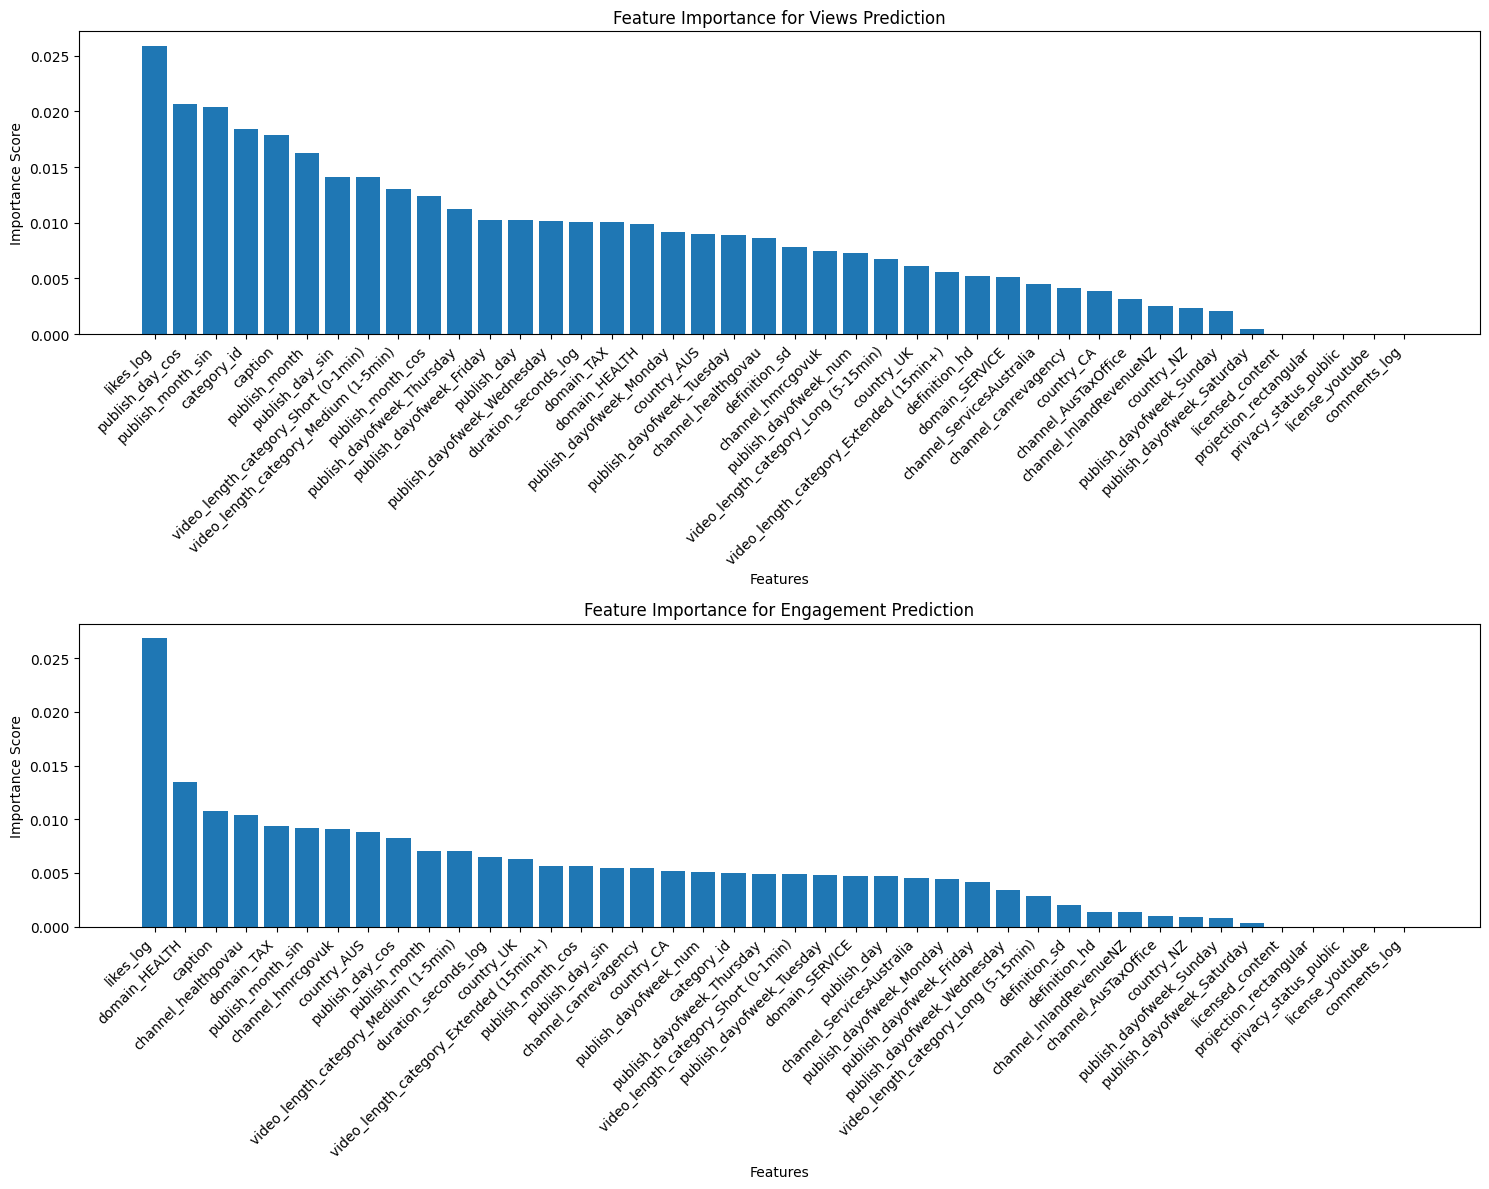


Top 10 features for Views prediction:
1. likes_log: 0.0259
2. publish_day_cos: 0.0207
3. publish_month_sin: 0.0204
4. category_id: 0.0184
5. caption: 0.0178
6. publish_month: 0.0162
7. publish_day_sin: 0.0141
8. video_length_category_Short (0-1min): 0.0141
9. video_length_category_Medium (1-5min): 0.0130
10. publish_month_cos: 0.0124

Top 10 features for Engagement prediction:
1. likes_log: 0.0269
2. domain_HEALTH: 0.0135
3. caption: 0.0108
4. channel_healthgovau: 0.0104
5. domain_TAX: 0.0093
6. publish_month_sin: 0.0092
7. channel_hmrcgovuk: 0.0090
8. country_AUS: 0.0088
9. publish_day_cos: 0.0082
10. publish_month: 0.0071

Test Set Performance:
Views R²: 0.4412
Engagement R²: 0.2741
Views MAE: 0.0592
Engagement MAE: 0.0265


In [ ]:
# =========================
# Revised Feature Importance Analysis
# =========================
def analyze_feature_importance(model, dataloader, feature_names, device):
    model.eval()
    feature_impacts_views = np.zeros(len(feature_names))
    feature_impacts_eng = np.zeros(len(feature_names))
    total_samples = 0

    with torch.no_grad():
        for batch in dataloader:
            features = batch['features'].to(device)
            batch_size = features.size(0)

            # Store original predictions
            original_pred_views, original_pred_eng = model(features)

            # Test impact of each feature
            for i in range(len(feature_names)):
                # Create perturbed features
                perturbed_features = features.clone()
                perturbed_features[:, i] = 0  # Zero out the feature

                # Get new predictions
                new_pred_views, new_pred_eng = model(perturbed_features)

                # Calculate impact separately for views and engagement
                views_impact = torch.abs(original_pred_views - new_pred_views).mean().item()
                eng_impact = torch.abs(original_pred_eng - new_pred_eng).mean().item()

                feature_impacts_views[i] += views_impact * batch_size
                feature_impacts_eng[i] += eng_impact * batch_size

            total_samples += batch_size

    # Normalize feature impacts
    feature_impacts_views /= total_samples
    feature_impacts_eng /= total_samples

    # Create and sort feature importance dictionaries
    feature_importance_views = dict(zip(feature_names, feature_impacts_views))
    feature_importance_eng = dict(zip(feature_names, feature_impacts_eng))

    sorted_importance_views = dict(sorted(feature_importance_views.items(),
                                        key=lambda x: x[1],
                                        reverse=True))
    sorted_importance_eng = dict(sorted(feature_importance_eng.items(),
                                      key=lambda x: x[1],
                                      reverse=True))

    # Plotting
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

    # Plot for Views
    ax1.bar(range(len(sorted_importance_views)), list(sorted_importance_views.values()))
    ax1.set_xticks(range(len(sorted_importance_views)))
    ax1.set_xticklabels(list(sorted_importance_views.keys()), rotation=45, ha='right')
    ax1.set_title('Feature Importance for Views Prediction')
    ax1.set_xlabel('Features')
    ax1.set_ylabel('Importance Score')

    # Plot for Engagement
    ax2.bar(range(len(sorted_importance_eng)), list(sorted_importance_eng.values()))
    ax2.set_xticks(range(len(sorted_importance_eng)))
    ax2.set_xticklabels(list(sorted_importance_eng.keys()), rotation=45, ha='right')
    ax2.set_title('Feature Importance for Engagement Prediction')
    ax2.set_xlabel('Features')
    ax2.set_ylabel('Importance Score')

    plt.tight_layout()
    plt.show()

    return sorted_importance_views, sorted_importance_eng

# =========================
# Revised Test Predictions
# =========================
def generate_predictions(model, test_loader, device, scaler_views=None):
    model.eval()
    all_views_pred = []
    all_eng_pred = []
    all_views_true = []
    all_eng_true = []

    with torch.no_grad():
        for batch in test_loader:
            features = batch['features'].to(device)
            views_pred, eng_pred = model(features)

            # Move to CPU and convert to numpy
            views_pred = views_pred.cpu().numpy()
            eng_pred = eng_pred.cpu().numpy()
            views_true = batch['views'].numpy()
            eng_true = batch['engagement'].numpy()

            # Inverse transform if scaler was used
            if scaler_views is not None:
                views_pred = np.expm1(views_pred)  # Inverse of log1p
                views_true = np.expm1(views_true)

            all_views_pred.extend(views_pred)
            all_eng_pred.extend(eng_pred)
            all_views_true.extend(views_true)
            all_eng_true.extend(eng_true)

    # Convert to numpy arrays
    all_views_pred = np.array(all_views_pred)
    all_eng_pred = np.array(all_eng_pred)
    all_views_true = np.array(all_views_true)
    all_eng_true = np.array(all_eng_true)

    # Calculate metrics
    views_r2 = r2_score(all_views_true, all_views_pred)
    eng_r2 = r2_score(all_eng_true, all_eng_pred)
    views_mae = mean_absolute_error(all_views_true, all_views_pred)
    eng_mae = mean_absolute_error(all_eng_true, all_eng_pred)

    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Views plot
    ax1.scatter(all_views_true, all_views_pred, alpha=0.5, s=10)
    min_val = min(all_views_true.min(), all_views_pred.min())
    max_val = max(all_views_true.max(), all_views_pred.max())
    ax1.plot([min_val, max_val], [min_val, max_val], 'r--')
    ax1.set_title(f'Views Predictions\nR² = {views_r2:.3f}, MAE = {views_mae:.3f}')
    ax1.set_xlabel('True Values')
    ax1.set_ylabel('Predicted Values')

    # Engagement plot
    ax2.scatter(all_eng_true, all_eng_pred, alpha=0.5, s=10)
    min_val = min(all_eng_true.min(), all_eng_pred.min())
    max_val = max(all_eng_true.max(), all_eng_pred.max())
    ax2.plot([min_val, max_val], [min_val, max_val], 'r--')
    ax2.set_title(f'Engagement Predictions\nR² = {eng_r2:.3f}, MAE = {eng_mae:.3f}')
    ax2.set_xlabel('True Values')
    ax2.set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

    return {
        'views_r2': views_r2,
        'engagement_r2': eng_r2,
        'views_mae': views_mae,
        'engagement_mae': eng_mae,
        'predictions': {
            'views': all_views_pred,
            'engagement': all_eng_pred
        }
    }

# Run analysis
print("Analyzing feature importance...")
feature_importance_views, feature_importance_eng = analyze_feature_importance(
    trained_model, test_loader, X_train.columns, device
)

print("\nTop 10 features for Views prediction:")
for i, (feature, importance) in enumerate(list(feature_importance_views.items())[:10], 1):
    print(f"{i}. {feature}: {importance:.4f}")

print("\nTop 10 features for Engagement prediction:")
for i, (feature, importance) in enumerate(list(feature_importance_eng.items())[:10], 1):
    print(f"{i}. {feature}: {importance:.4f}")

print("\nTest Set Performance:")
print(f"Views R²: {test_results['views_r2']:.4f}")
print(f"Engagement R²: {test_results['engagement_r2']:.4f}")
print(f"Views MAE: {test_results['views_mae']:.4f}")
print(f"Engagement MAE: {test_results['engagement_mae']:.4f}")

### 4.3.2 SHAP (transformer-based)

Step 1: Setting up environment and loading model...

Step 2: Loading and verifying model...
✓ Model loaded successfully!

Model Configuration:
• Input dimension: 42
• Number of heads: 4
• Number of layers: 2

Step 3: Preparing data and calculating SHAP values...
• Sampling background data...
• Initializing SHAP explainers...
• Calculating SHAP values for views...


100%|██████████| 100/100 [00:10<00:00,  9.94it/s]


• Calculating SHAP values for engagement...


100%|██████████| 100/100 [00:09<00:00, 10.00it/s]



Verifying SHAP values:
• Views SHAP shape: (100, 42, 1)
• Engagement SHAP shape: (100, 42, 1)
• Features count: 42
• Sample size: 100

SHAP Value Statistics:
Views SHAP range: -0.064519 to 0.136315
Engagement SHAP range: -0.049207 to 0.140110

Step 4: Creating visualizations...

Generating visualizations with improved styling...


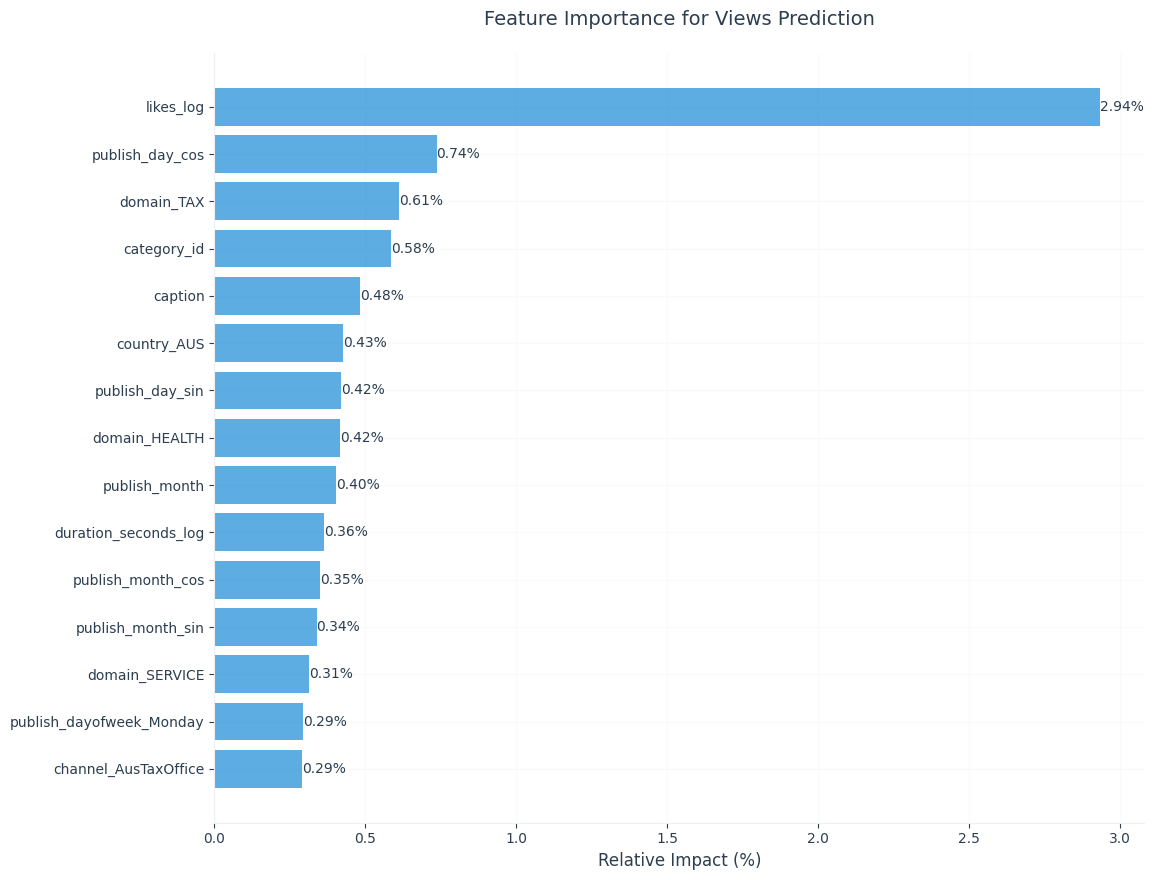

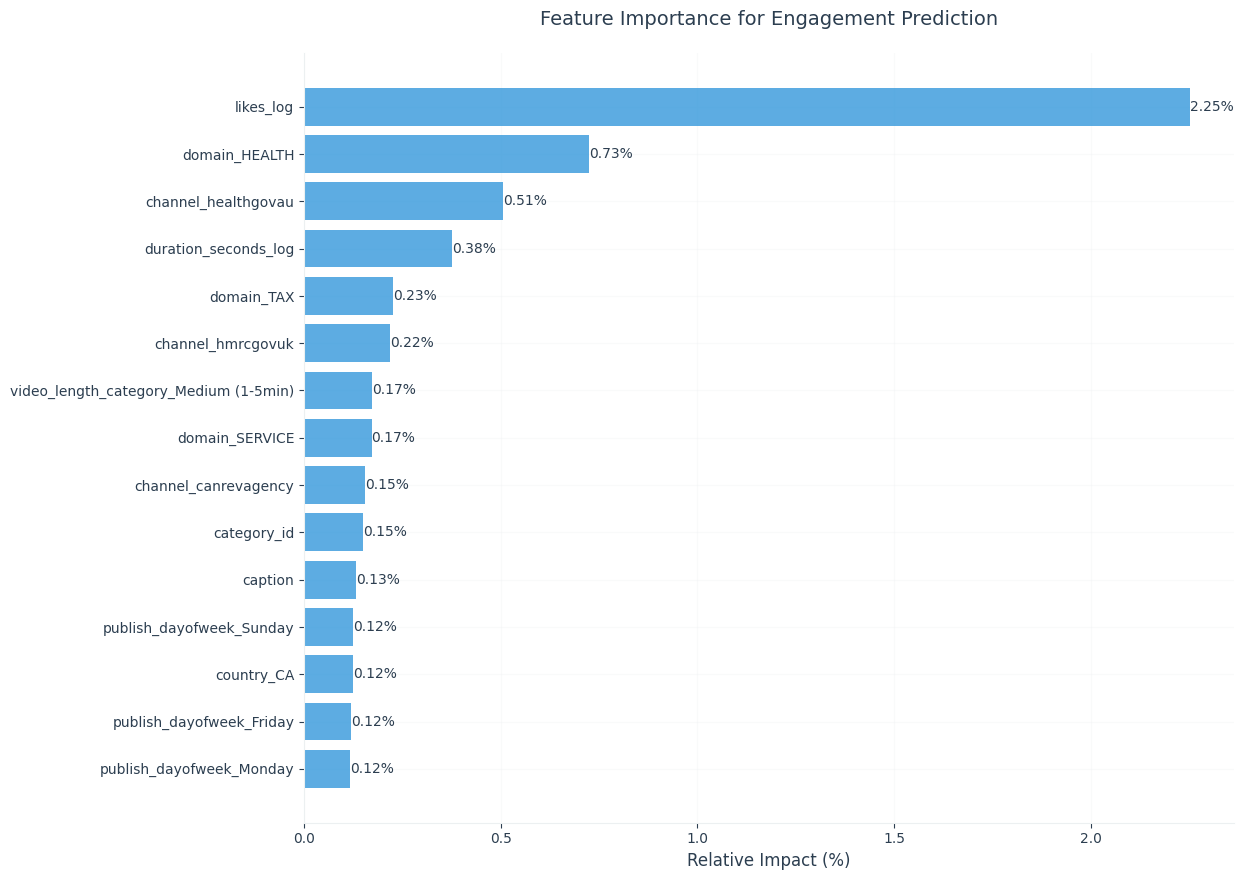

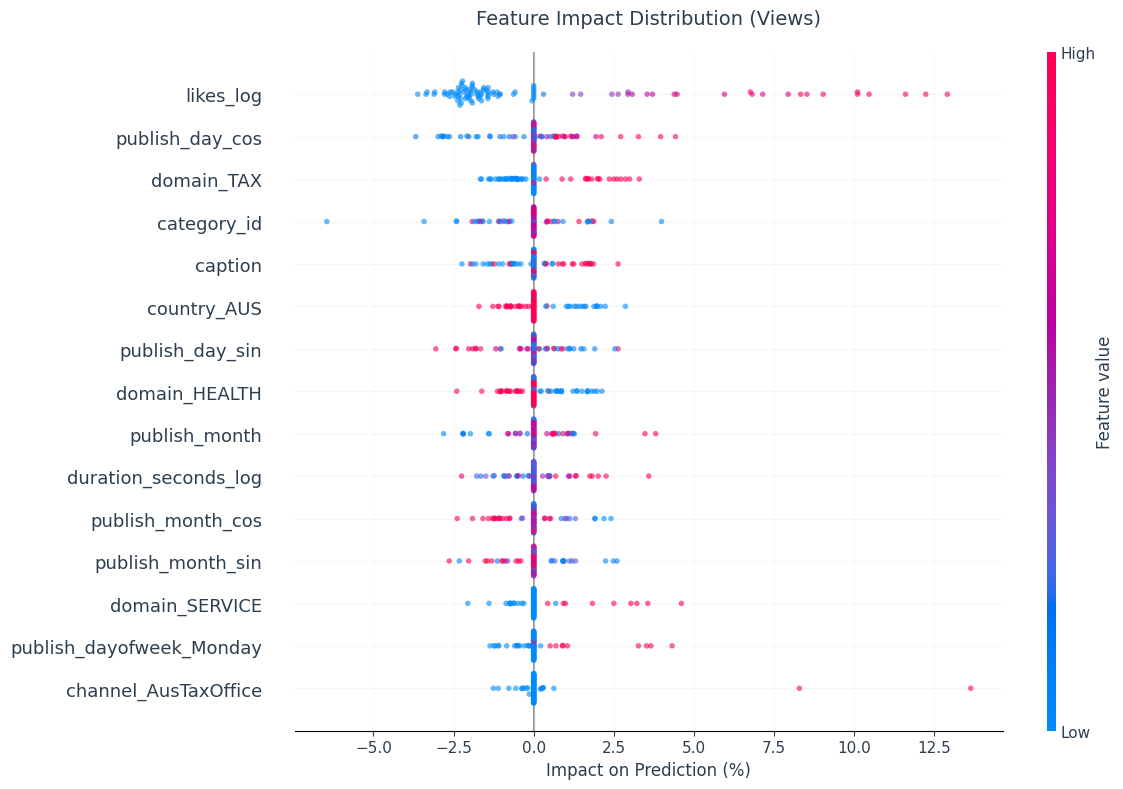

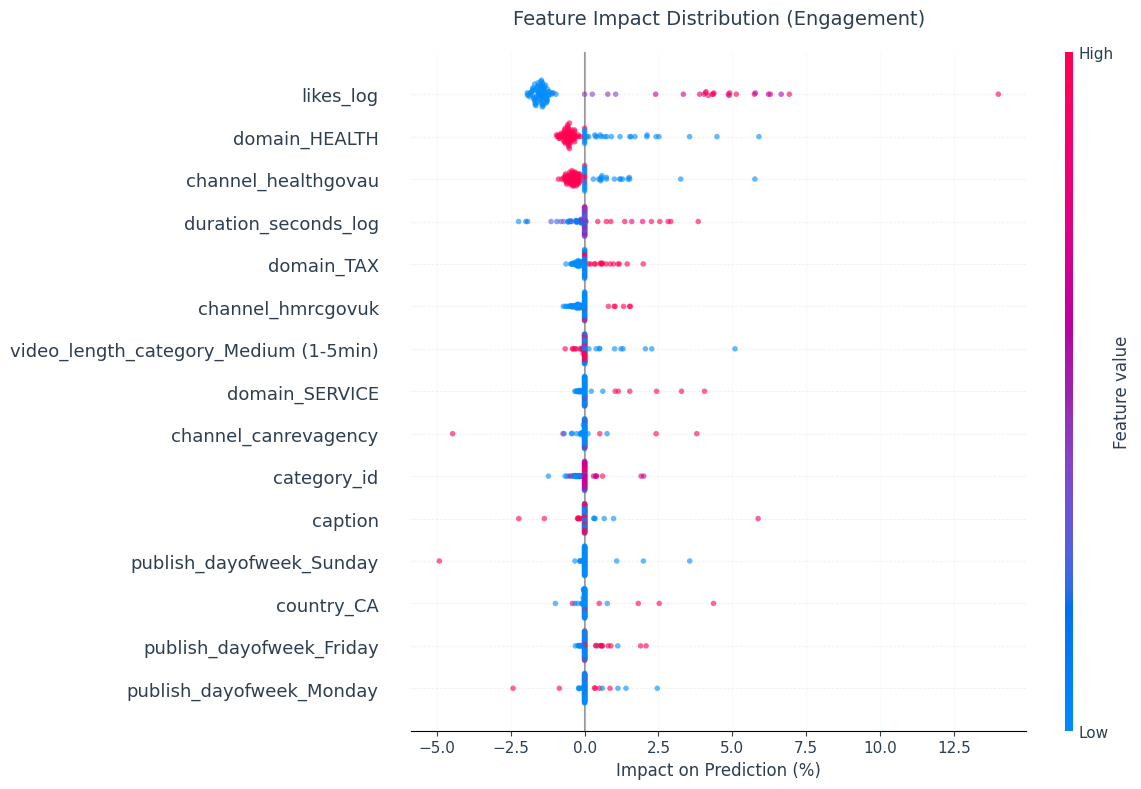


Top Features for Views Prediction:
------------------------------------------------------------
Rank  Feature                       Relative Impact
------------------------------------------------------------
1     likes_log                     2.94%
2     publish_day_cos               0.74%
3     domain_TAX                    0.61%
4     category_id                   0.58%
5     caption                       0.48%
6     country_AUS                   0.43%
7     publish_day_sin               0.42%
8     domain_HEALTH                 0.42%
9     publish_month                 0.40%
10    duration_seconds_log          0.36%
11    publish_month_cos             0.35%
12    publish_month_sin             0.34%
13    domain_SERVICE                0.31%
14    publish_dayofweek_Monday      0.29%
15    channel_AusTaxOffice          0.29%

Top Features for Engagement Prediction:
------------------------------------------------------------
Rank  Feature                       Relative Impact
------

In [ ]:
import torch
import os
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define color scheme
COLORS = {
    'bar_color': '#3498db',  # Nice blue
    'grid_color': '#ecf0f1',  # Light gray
    'text_color': '#2c3e50',  # Dark blue-gray
    'positive_impact': '#2ecc71',  # Green
    'negative_impact': '#e74c3c'   # Red
}

print("Step 1: Setting up environment and loading model...")

# Model wrapper classes for SHAP
class ModelWrapper:
    def __init__(self, model, device):
        self.model = model
        self.device = device
        self.model.eval()

class ViewsModelWrapper(ModelWrapper):
    def __call__(self, X):
        if isinstance(X, np.ndarray):
            X = torch.FloatTensor(X)
        X = X.to(self.device)
        with torch.no_grad():
            views_pred, _ = self.model(X)
            return views_pred.cpu().numpy()

class EngagementModelWrapper(ModelWrapper):
    def __call__(self, X):
        if isinstance(X, np.ndarray):
            X = torch.FloatTensor(X)
        X = X.to(self.device)
        with torch.no_grad():
            _, eng_pred = self.model(X)
            return eng_pred.cpu().numpy()

# Load model
model_path = r"C:\Users\Essi_ASUS_STRIX\Desktop\Unit-3\Coding\Saved_Models_Data\models\transformer_20241108_1531.pth"

print("\nStep 2: Loading and verifying model...")

def load_transformer_model(model_path):
    model_info = torch.load(model_path, weights_only=False)
    model = YouTubeTransformer(
        input_dim=model_info['model_config']['input_dim'],
        nhead=model_info['model_config']['nhead'],
        num_layers=model_info['model_config']['num_layers']
    )
    model.load_state_dict(model_info['model_state'])
    return model, model_info

try:
    loaded_model, model_info = load_transformer_model(model_path)
    loaded_model = loaded_model.to(device)
    loaded_model.eval()
    print("✓ Model loaded successfully!")
    print("\nModel Configuration:")
    print(f"• Input dimension: {model_info['model_config']['input_dim']}")
    print(f"• Number of heads: {model_info['model_config']['nhead']}")
    print(f"• Number of layers: {model_info['model_config']['num_layers']}")
except Exception as e:
    print(f"✗ Error loading model: {str(e)}")
    raise

print("\nStep 3: Preparing data and calculating SHAP values...")

# Prepare data samples
print("• Sampling background data...")
background = X_train_processed.sample(min(100, len(X_train_processed))).values
test_sample = X_test_processed[:100].values

# Initialize SHAP explainers
print("• Initializing SHAP explainers...")
views_wrapper = ViewsModelWrapper(loaded_model, device)
eng_wrapper = EngagementModelWrapper(loaded_model, device)
views_explainer = shap.KernelExplainer(views_wrapper, background)
eng_explainer = shap.KernelExplainer(eng_wrapper, background)

# Calculate SHAP values
print("• Calculating SHAP values for views...")
views_shap_values = views_explainer.shap_values(
    test_sample,
    nsamples=100,
    l1_reg="num_features(10)"
)

print("• Calculating SHAP values for engagement...")
eng_shap_values = eng_explainer.shap_values(
    test_sample,
    nsamples=100,
    l1_reg="num_features(10)"
)

# Verify SHAP values
print("\nVerifying SHAP values:")
print(f"• Views SHAP shape: {views_shap_values.shape}")
print(f"• Engagement SHAP shape: {eng_shap_values.shape}")
print(f"• Features count: {len(X_train.columns)}")
print(f"• Sample size: {test_sample.shape[0]}")

print("\nSHAP Value Statistics:")
print(f"Views SHAP range: {np.squeeze(views_shap_values).min():.6f} to {np.squeeze(views_shap_values).max():.6f}")
print(f"Engagement SHAP range: {np.squeeze(eng_shap_values).min():.6f} to {np.squeeze(eng_shap_values).max():.6f}")

print("\nStep 4: Creating visualizations...")

def plot_feature_importance(shap_values, test_data, feature_names, title):
    feature_names = list(feature_names)
    shap_values = np.squeeze(shap_values)
    mean_abs_shap = np.abs(shap_values).mean(0) * 100

    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': mean_abs_shap
    })
    feature_importance = feature_importance.sort_values('importance', ascending=True)

    plt.figure(figsize=(12, 10))
    bars = plt.barh(range(len(feature_importance[-15:])),
                   feature_importance['importance'][-15:],
                   color=COLORS['bar_color'],
                   alpha=0.8)

    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                f'{width:.2f}%',
                ha='left', va='center',
                fontsize=10,
                color=COLORS['text_color'])

    plt.yticks(range(len(feature_importance[-15:])),
              feature_importance['feature'][-15:],
              fontsize=10,
              color=COLORS['text_color'])

    plt.title(title, pad=20, fontsize=14, color=COLORS['text_color'])
    plt.xlabel("Relative Impact (%)", fontsize=12, color=COLORS['text_color'])

    plt.grid(True, alpha=0.3, color=COLORS['grid_color'])
    plt.gca().set_axisbelow(True)

    for spine in plt.gca().spines.values():
        spine.set_color(COLORS['grid_color'])

    plt.show()

def plot_shap_distribution(shap_values, test_data, feature_names, title):
    shap_values = np.squeeze(shap_values) * 100

    # Get feature order from mean absolute SHAP values
    mean_abs_shap = np.abs(shap_values).mean(0)
    feature_order = np.argsort(-mean_abs_shap)  # Negative for descending order

    # Reorder features and data
    ordered_features = [list(feature_names)[i] for i in feature_order[:15]]
    ordered_shap = shap_values[:, feature_order[:15]]
    ordered_data = test_data[:, feature_order[:15]]

    plt.figure(figsize=(12, 10))

    # Create SHAP summary plot with ordered data
    shap.summary_plot(
        ordered_shap,
        ordered_data,
        feature_names=ordered_features,
        plot_type="dot",
        show=False,
        alpha=0.6,
        plot_size=(12, 8)
    )

    plt.title(title, pad=20, fontsize=14, color=COLORS['text_color'])
    plt.xlabel("Impact on Prediction (%)", fontsize=12, color=COLORS['text_color'])
    plt.gca().tick_params(colors=COLORS['text_color'])

    plt.tight_layout()
    plt.show()

def print_feature_importance(shap_values, feature_names, target_name):
    shap_values = np.squeeze(shap_values)
    mean_abs_shap = np.abs(shap_values).mean(0) * 100

    feature_importance_dict = dict(zip(feature_names, mean_abs_shap))
    sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

    print(f"\nTop Features for {target_name} Prediction:")
    print("-" * 60)
    print(f"{'Rank':<6}{'Feature':<30}{'Relative Impact':<15}")
    print("-" * 60)
    for i, (feature, importance) in enumerate(sorted_features[:15], 1):
        print(f"{i:<6}{feature:<30}{importance:.2f}%")
    return sorted_features

print("\nGenerating visualizations with improved styling...")

# Set global style using a built-in matplotlib style
plt.style.use('default')

# Set custom parameters
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.grid': True,
    'grid.alpha': 0.3,
    'grid.color': COLORS['grid_color'],
    'axes.labelcolor': COLORS['text_color'],
    'xtick.color': COLORS['text_color'],
    'ytick.color': COLORS['text_color'],
    'text.color': COLORS['text_color'],
    'axes.spines.top': False,
    'axes.spines.right': False
})

# Generate plots
plot_feature_importance(views_shap_values, test_sample, X_train.columns,
                       "Feature Importance for Views Prediction")
plot_feature_importance(eng_shap_values, test_sample, X_train.columns,
                       "Feature Importance for Engagement Prediction")

plot_shap_distribution(views_shap_values, test_sample, X_train.columns,
                      "Feature Impact Distribution (Views)")
plot_shap_distribution(eng_shap_values, test_sample, X_train.columns,
                      "Feature Impact Distribution (Engagement)")

# Print rankings
views_importance = print_feature_importance(views_shap_values, X_train.columns, "Views")
eng_importance = print_feature_importance(eng_shap_values, X_train.columns, "Engagement")

print("\nAnalysis complete! ✓")